# King County Housing Predictions

#### Mark Patterson, Matthew Zhang, Mel Friedman

## Objective

M3 Consulting CO. is developing solutions to help average people find "good homes" and is working with
non-profit organizations to provide a service.
Recently, a family of 4 is looking to buy their first home in King County. M3 Consulting decides to analyze data
of people with median income to optimize home affordability. Additionally, with the impact of the technology boom
and rising home prices, the family of 4 is not sure where to look. 
-Predicting house prices under 500k (median)
-Identifying which parts of King County these houses exist
-"Good home" being specific statistically significant features

## Data Cleaning & EDA

The data used in this project is from the King County Housing Data set provided.

In [3]:
# Import relevant and necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [147]:
#Loading in the data set and setting style to Seaborn
df = pd.read_csv('data/kc_house_data.csv')
plt.style.use('seaborn')

In [5]:
# Review size and shape of the data (at this stage)
print(df.shape)
display(df.info())
display('-'*60)
display(df.isnull().any())
display(df.isnull().sum())
display('-'*60)
df.head()

(21597, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


None

'------------------------------------------------------------'

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

'------------------------------------------------------------'

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [6]:
#Identfied sqft_basement as an object type, so convert it to numeric.
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


None

In order to explore the data, we first organized the data frame into 3 separate data frames to help understand
the visualizations.

In [7]:
# Seperate groups of features into seperate dataframes: counts, size, condition
df_counts = df[['price','floors', 'bedrooms', 'bathrooms', 'waterfront', 'view']]
df_condition = df[['price','condition', 'grade', 'yr_built', 'yr_renovated', 'lat', 'long', 'zipcode']]
df_size = df[['price','sqft_lot', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']]

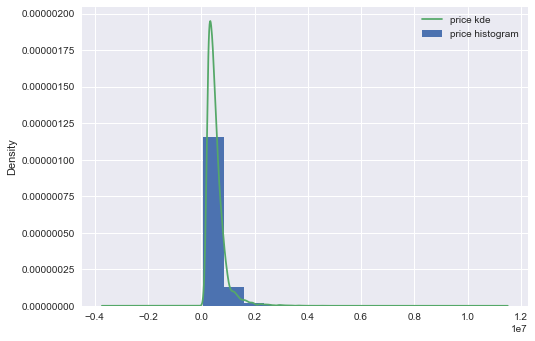

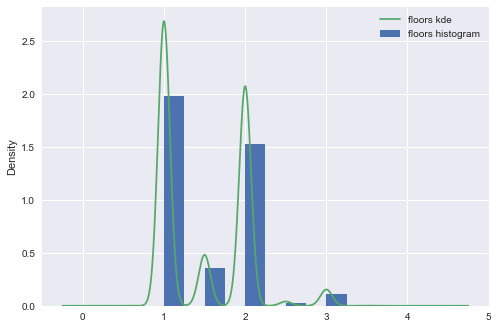

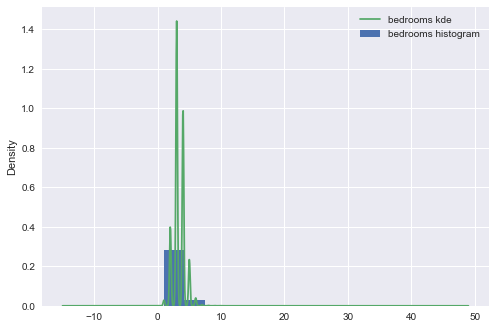

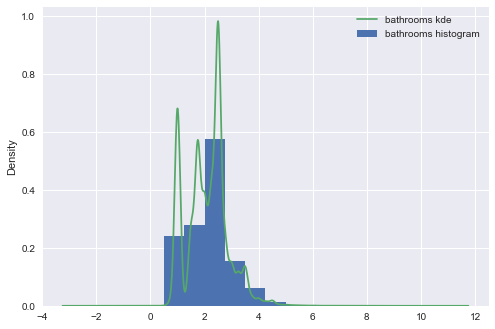

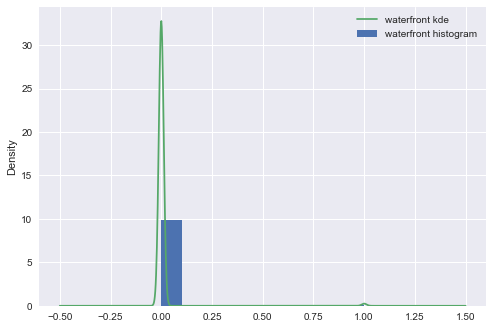

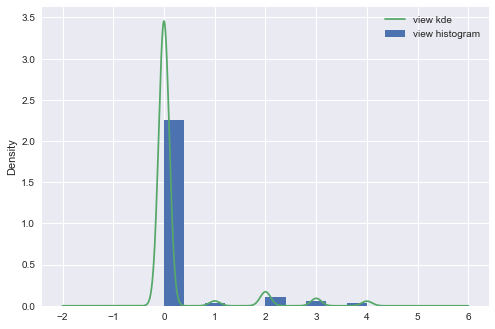

In [8]:
# Take a look at the distributions of some key features
for column in df_counts:
    df_counts[column].plot.hist(density=True, label = column+' histogram')
    df_counts[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

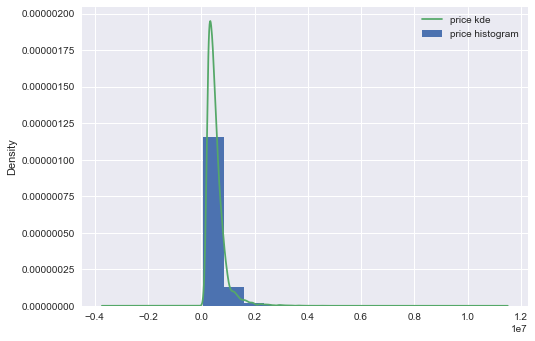

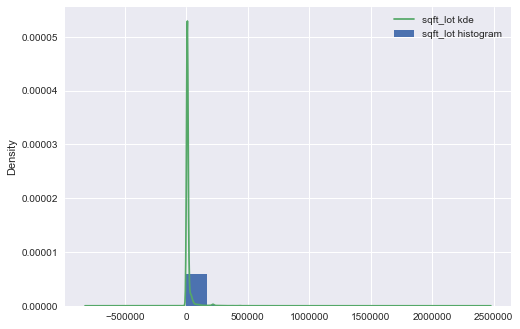

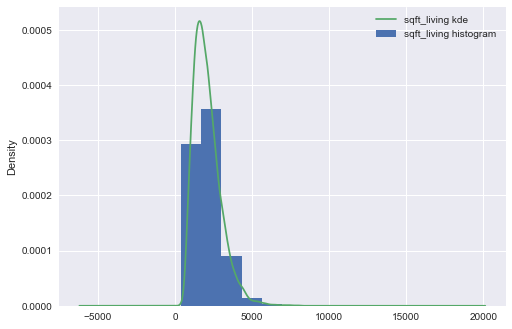

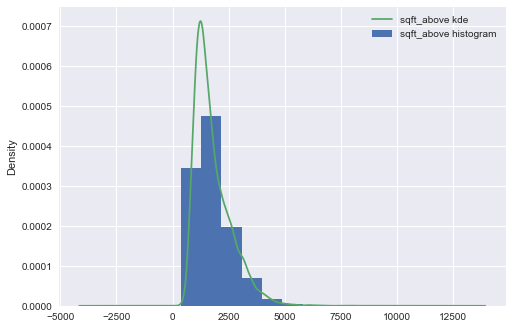

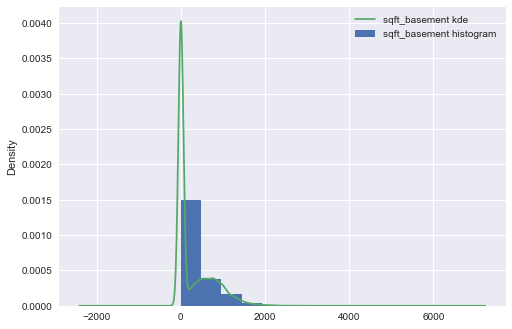

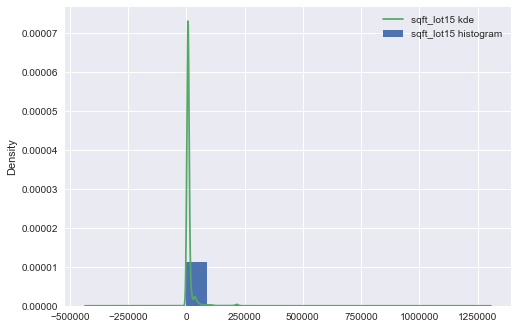

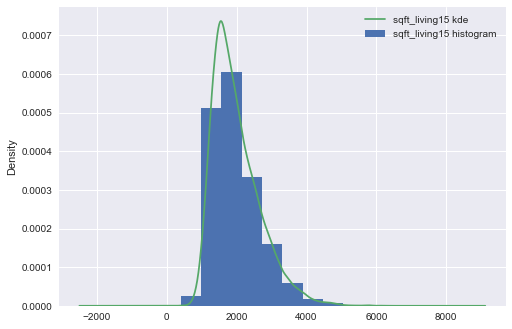

In [9]:
for column in df_size:
    df_size[column].plot.hist(density=True, label = column+' histogram')
    df_size[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

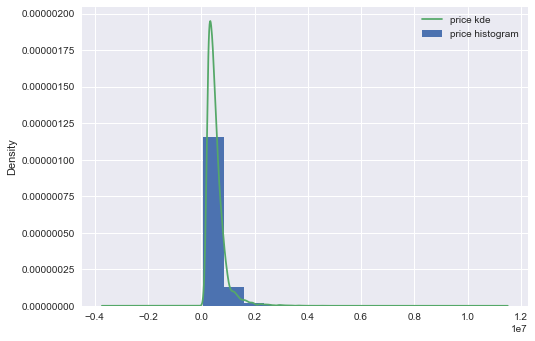

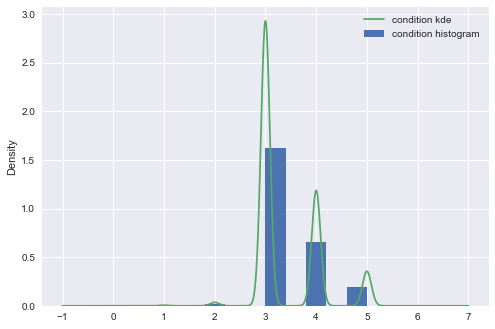

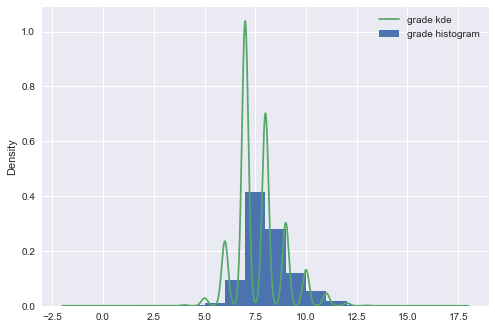

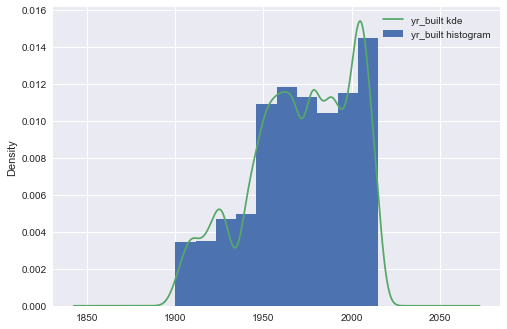

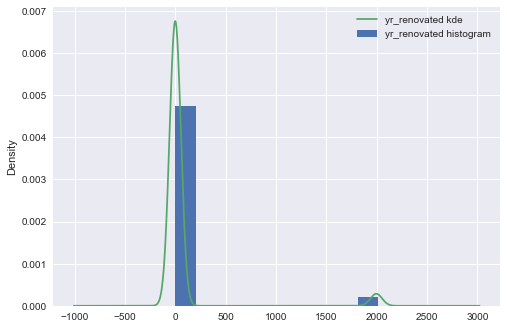

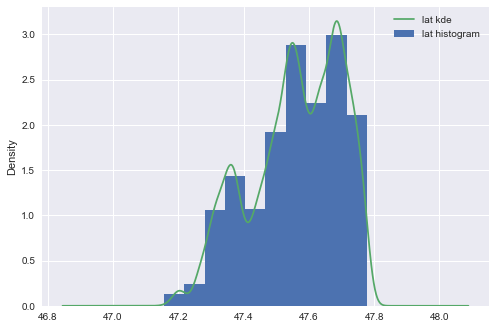

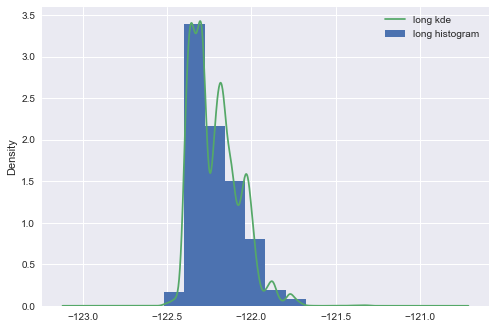

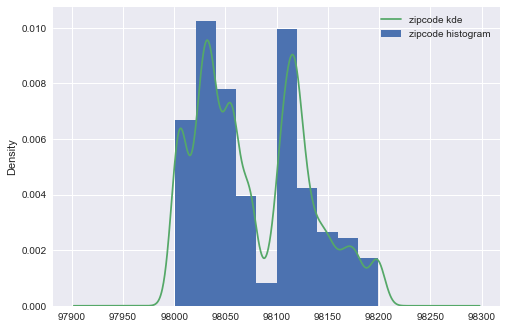

In [10]:
for column in df_condition:
    df_condition[column].plot.hist(density=True, label = column+' histogram')
    df_condition[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

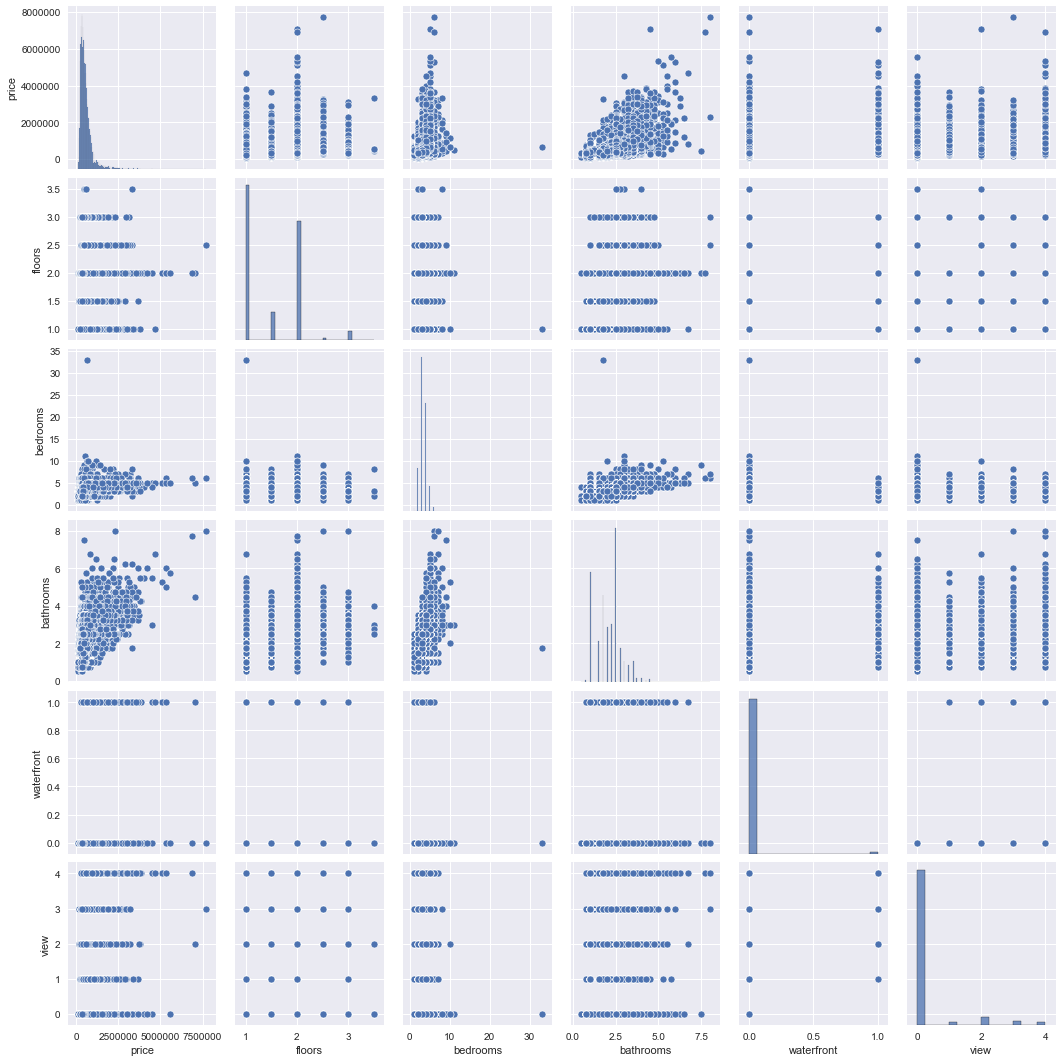

In [11]:
# Take a look at scatter plots and look for linear relationships
# sns.pairplot(data[['GrLivArea', 'OverallQual', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'SalePrice']])
sns.pairplot(df_counts)

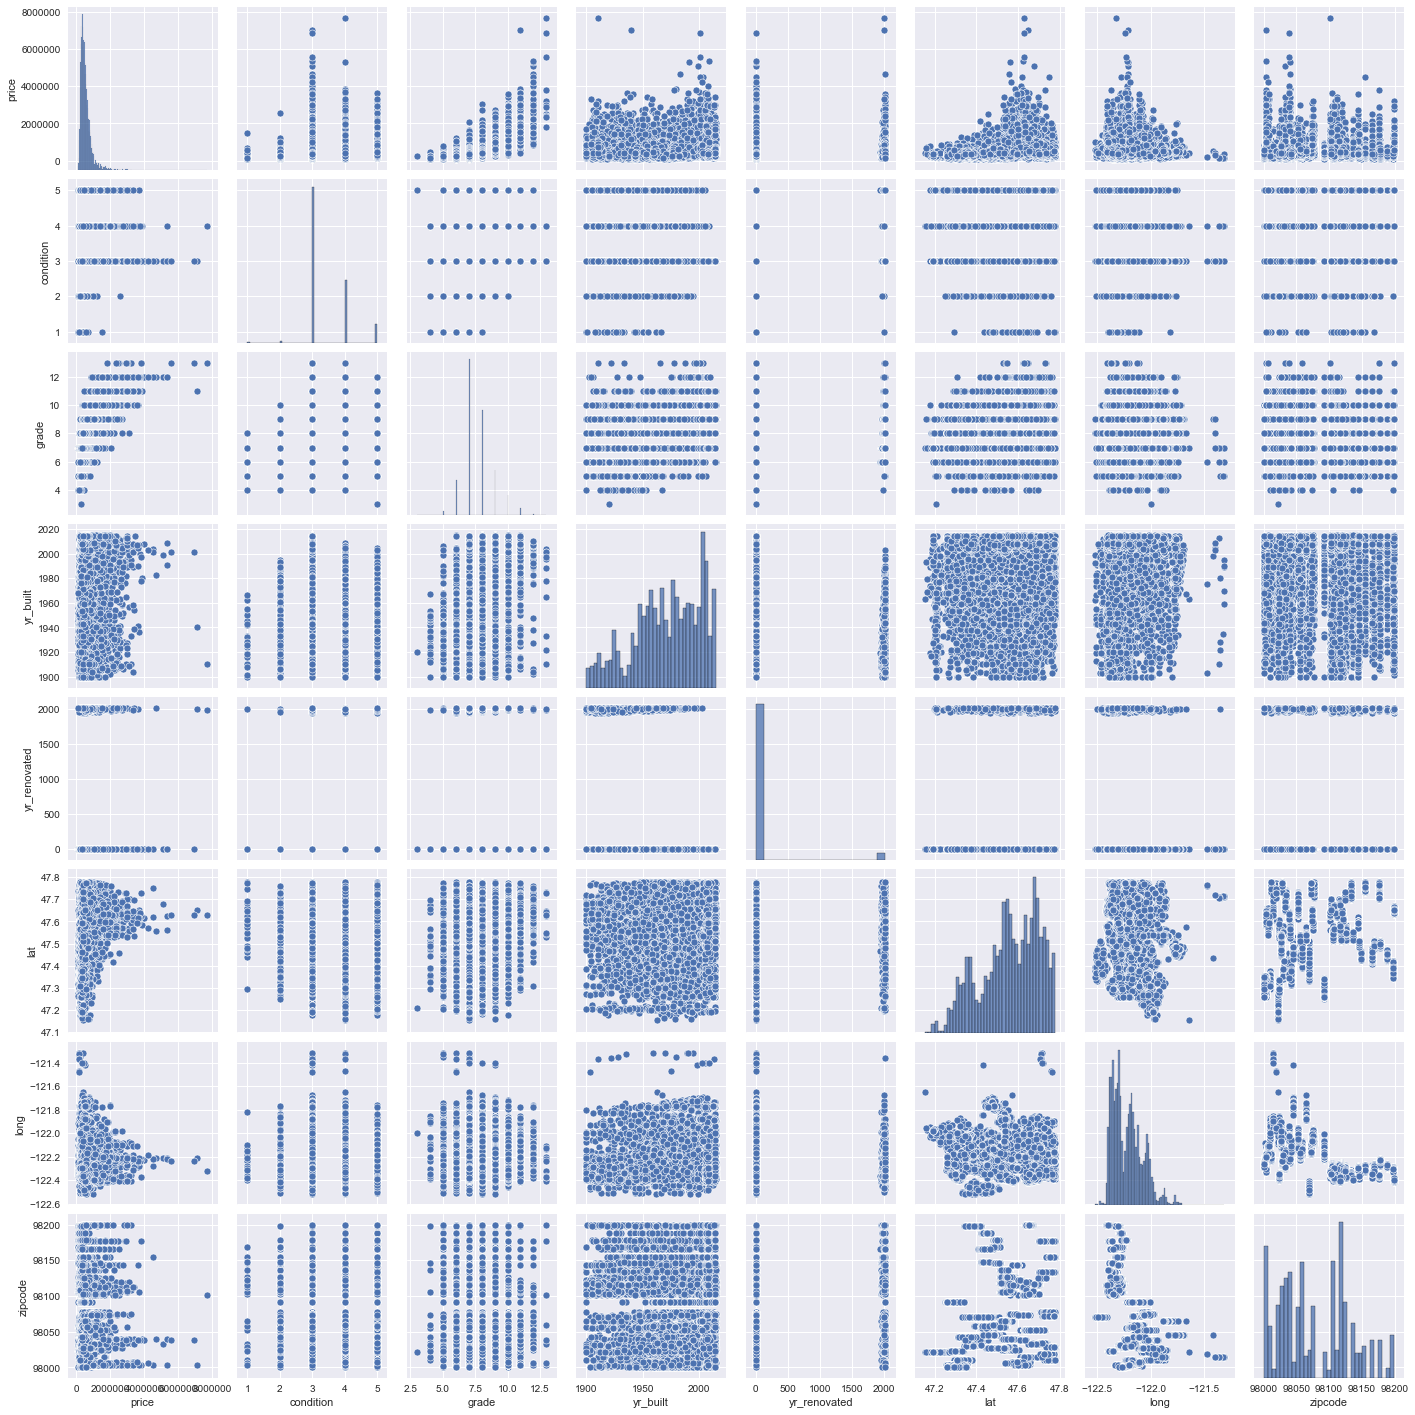

In [12]:
sns.pairplot(df_condition)

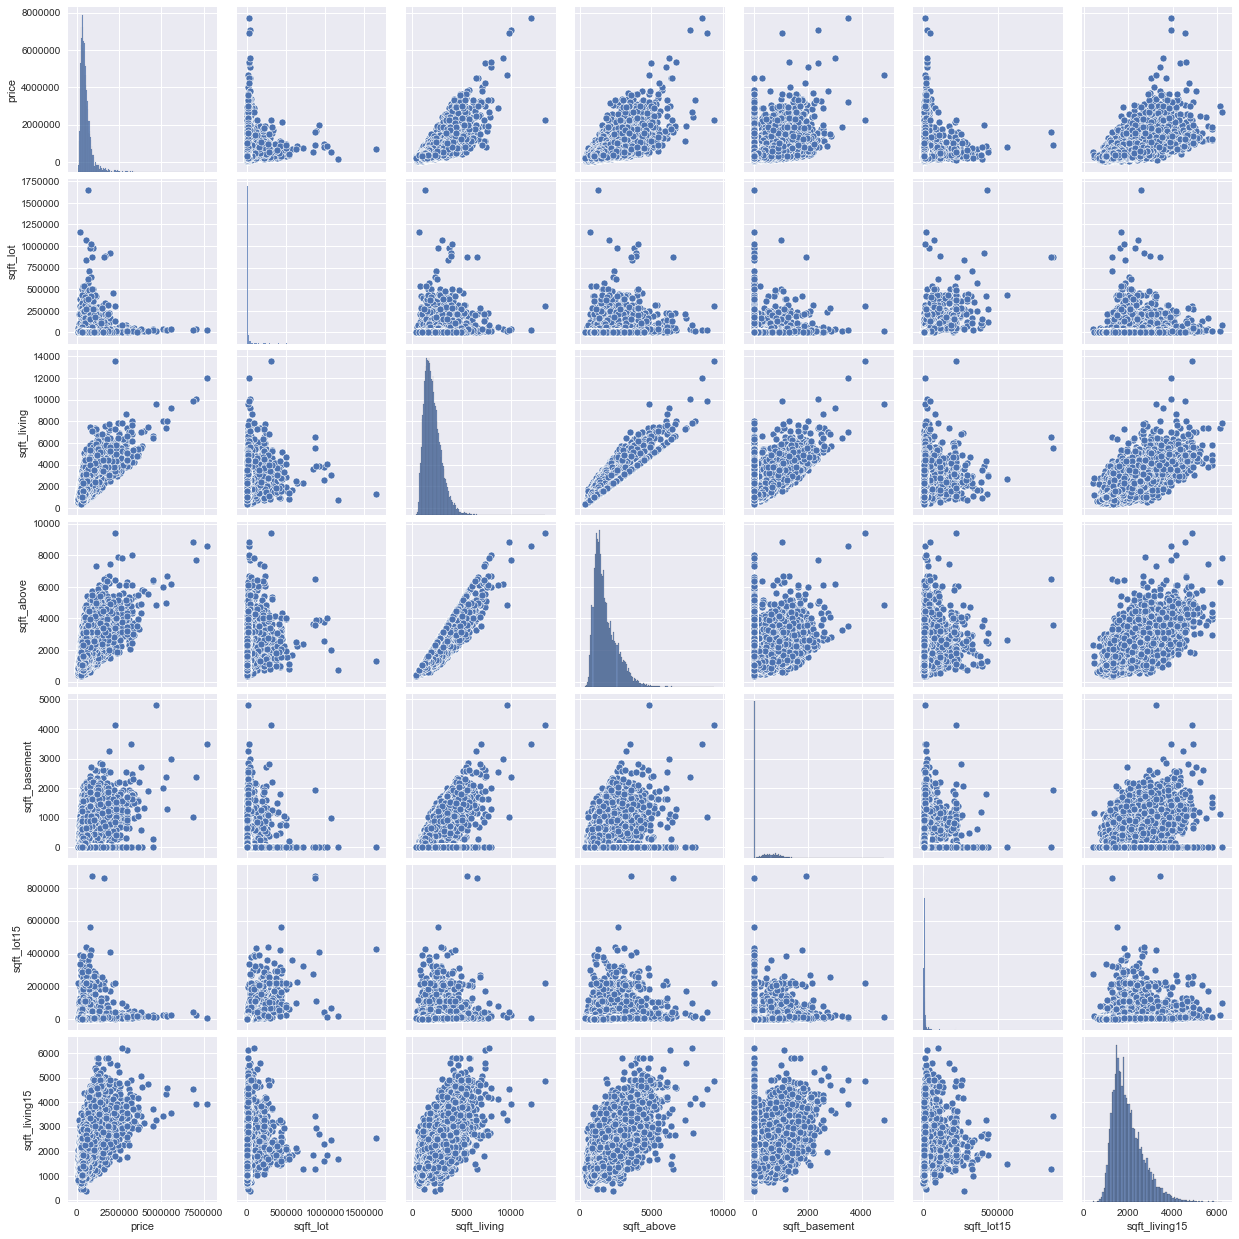

In [13]:
sns.pairplot(df_size)

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016772  0.001150   0.005162    -0.012241 -0.131911   
price         -0.016772  1.000000  0.308787   0.525906     0.701917  0.089876   
bedrooms       0.001150  0.308787  1.000000   0.514508     0.578212  0.032471   
bathrooms      0.005162  0.525906  0.514508   1.000000     0.755758  0.088373   
sqft_living   -0.012241  0.701917  0.578212   0.755758     1.000000  0.173453   
sqft_lot      -0.131911  0.089876  0.032471   0.088373     0.173453  1.000000   
floors         0.018608  0.256804  0.177944   0.502582     0.353953 -0.004814   
waterfront    -0.004176  0.276295 -0.002386   0.067282     0.110230  0.023143   
view           0.011592  0.395734  0.078523   0.186451     0.282532  0.075298   
condition     -0.023803  0.036056  0.026496  -0.126479    -0.059445 -0.008830   
grade          0.008188  0.667951  0.356563   0.665838     0.762779  0.114731   
sqft_above    -0.010799  0.605368  0.479386   0.686668     0.876448  0.184139   
sqft_basement -0.004548  0.325008  0.302683   0.282693     0.434576  0.015533   
yr_built       0.021617  0.053953  0.155670   0.507173     0.318152  0.052946   
yr_renovated  -0.012010  0.129599  0.018495   0.051050     0.055660  0.004513   
zipcode       -0.008211 -0.053402 -0.154092  -0.204786    -0.199802 -0.129586   
lat           -0.001798  0.306692 -0.009951   0.024280     0.052155 -0.085514   
long           0.020672  0.022036  0.132054   0.224903     0.241214  0.230227   
sqft_living15 -0.002701  0.585241  0.393406   0.569884     0.756402  0.144763   
sqft_lot15    -0.138557  0.082845  0.030690   0.088303     0.184342  0.718204   

                 floors  waterfront      view  condition     grade  \
id             0.018608   -0.004176  0.011592  -0.023803  0.008188   
price          0.256804    0.276295  0.395734   0.036056  0.667951   
bedrooms       0.177944   -0.002386  0.078523   0.026496  0.356563   
bathrooms      0.502582    0.067282  0.186451  -0.126479  0.665838   
sqft_living    0.353953    0.110230  0.282532  -0.059445  0.762779   
sqft_lot      -0.004814    0.023143  0.075298  -0.008830  0.114731   
floors         1.000000    0.021883  0.028436  -0.264075  0.458794   
waterfront     0.021883    1.000000  0.406654   0.017642  0.087383   
view           0.028436    0.406654  1.000000   0.045735  0.249727   
condition     -0.264075    0.017642  0.045735   1.000000 -0.146896   
grade          0.458794    0.087383  0.249727  -0.146896  1.000000   
sqft_above     0.523989    0.075463  0.166299  -0.158904  0.756073   
sqft_basement -0.245144    0.090200  0.276521   0.170972  0.168023   
yr_built       0.489193   -0.026079 -0.054564  -0.361592  0.447865   
yr_renovated   0.003535    0.087244  0.100964  -0.061858  0.016669   
zipcode       -0.059541    0.031057  0.085277   0.002888 -0.185771   
lat            0.049239   -0.012772  0.006141  -0.015102  0.113575   
long           0.125943   -0.039864 -0.077894  -0.105877  0.200341   
sqft_living15  0.280102    0.088860  0.279561  -0.093072  0.713867   
sqft_lot15    -0.010722    0.032002  0.073332  -0.003126  0.120981   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id              -0.010799      -0.004548  0.021617     -0.012010 -0.008211   
price            0.605368       0.325008  0.053953      0.129599 -0.053402   
bedrooms         0.479386       0.302683  0.155670      0.018495 -0.154092   
bathrooms        0.686668       0.282693  0.507173      0.051050 -0.204786   
sqft_living      0.876448       0.434576  0.318152      0.055660 -0.199802   
sqft_lot         0.184139       0.015533  0.052946      0.004513 -0.129586   
floors           0.523989      -0.245144  0.489193      0.003535 -0.059541   
waterfront       0.075463       0.090200 -0.026079      0.087244  0.031057   
view             0.166299       0.276521 -0.054564      0.100964  0.085277   
condition       -0.158904       0.170972 -0.361592     -0.061858  0.

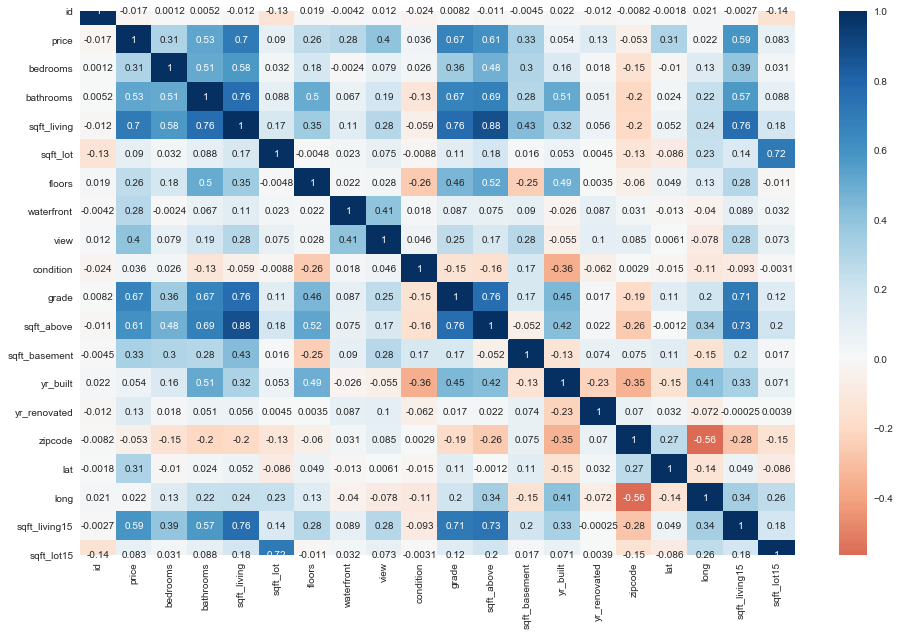

In [14]:
# Take a look at correlations between variables (multicollinearity)
corr = df.corr()
display(corr)
plt.figure(figsize=(16,10))
sns.heatmap(corr, cmap='RdBu', annot=True, center=0)
#So we have a few collerated features

Removing null values: Identified that some columns had null values and unianimously decided it was best to convert
these values to zeroes. We did not want to remove too many rows and after inspecting the columns, lots of values were
already zero so converting nulls to zeroes would not be impactful.

In [ ]:
n = df.nunique(axis=0) 
print("No.of.unique values in each column :\n", n)

In [179]:
# Change nulls to 0 for 4 columns
df = df.replace(np.NaN, 0.0)
display(df.isna().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [180]:
# Change "?" to 0
df = df.replace("?", 0.0)
display(df.isna().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Outliers: Start by cleaning price into 2 standard deviations from the mean using the stats.zscore.

In [181]:
# get rid of outliers for price (2 SD from mean)
df2 = df[(np.abs(stats.zscore(df['price']) < 2))]
df2.head(2)

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         0.0   0.0          3      7        1180   
1      7242     2.0         0.0   0.0          3      7        2170   

  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0           0.0      1955           0.0    98178  47.5112 -122.257   
1         400.0      1951        1991.0    98125  47.7210 -122.319   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639

In [182]:
df2['bedrooms'].value_counts()

3     9666
4     6470
2     2744
5     1392
6      238
1      196
7       32
8        9
9        4
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [183]:
#Remove obvious outliers using .loc
df2 = df2.loc[df2['bedrooms'] < 33]

In [22]:
display(df2['grade'].value_counts())
display(df2['view'].value_counts())
display(df2['condition'].value_counts())
display(df2['waterfront'].value_counts())
display(df2['floors'].value_counts())

7     8972
8     6047
9     2552
6     2038
10     997
11     283
5      242
12      32
4       27
3        1
Name: grade, dtype: int64

0.0    19312
2.0      904
3.0      451
1.0      306
4.0      218
Name: view, dtype: int64

3    13765
4     5582
5     1646
2      169
1       29
Name: condition, dtype: int64

0.0    21111
1.0       80
Name: waterfront, dtype: int64

1.0    10603
2.0     7959
1.5     1890
3.0      597
2.5      136
3.5        6
Name: floors, dtype: int64

### Model Approach A

Our first approach had initial thoughts of either focusing on low end homes or median priced homes. Felt that such a large price range of homes would not work well, so split into 3 and decided to focus on middle priced homes ($315K to $605K).

In [184]:
df2_high = df2.loc[df2['price'] > 605001]
df2_low = df2.loc[df2['price'] < 315000]
df2_mid = df2.loc[(df2['price'] > 315000) & (df2['price'] < 605001)]

In [39]:
#This approach focused on df2_mid with house prices ranging from $315,000-$605,001
df2_mid.head(2)

id       date     price  bedrooms  bathrooms  sqft_living  \
1  6414100192  12/9/2014  538000.0         3       2.25         2570   
3  2487200875  12/9/2014  604000.0         4       3.00         1960   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
1      7242     2.0         0.0   0.0          3      7        2170   
3      5000     1.0         0.0   0.0          5      7        1050   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
1          400.0      1951        1991.0    98125  47.7210 -122.319   
3          910.0      1965           0.0    98136  47.5208 -122.393   

   sqft_living15  sqft_lot15  
1           1690        7639  
3           1360        5000

In [156]:
#Drop unnecessary columns
df2_mid = df2_mid.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis=1)

In [43]:
df2_mid.head(2)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
1  538000.0         3       2.25         2570      7242     2.0         0.0   
3  604000.0         4       3.00         1960      5000     1.0         0.0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
1   0.0          3      7        2170          400.0      1951        1991.0   
3   0.0          5      7        1050          910.0      1965           0.0   

   sqft_living15  sqft_lot15  
1           1690        7639  
3           1360        5000

In [157]:
# Model 1: Playing around with different features, averaging an r2 of .12
f = 'price~bathrooms+yr_built+yr_renovated+grade'
model = ols(formula=f, data=df2_mid).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     342.5
Date:                Sun, 29 Nov 2020   Prob (F-statistic):          1.31e-273
Time:                        14:13:12   Log-Likelihood:            -1.0686e+05
No. Observations:                8442   AIC:                         2.137e+05
Df Residuals:                    8437   BIC:                         2.138e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      2.14e+06   7.22e+04     29.637      0.000       2e+06    2.28e+06
bathrooms     2.317e+04   1670.824     13.866      0.000    1.99e+04    2.64e+04
yr_built     -1025.1941     38.906    -26.351      0.000   -1101.459    -948.930
yr_renovated    -2.5968      2.469     -1.052      0.293      -7.438       2.244
grade          3.77e+04   1307.163     28.844      0.000    3.51e+04    4.03e+04
==============================================================================
Omnibus:                      828.896   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.827
Skew:                           0.149   Prob(JB):                     2.56e-59
Kurtosis:                       2.177   Cond. No.                     1.72e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


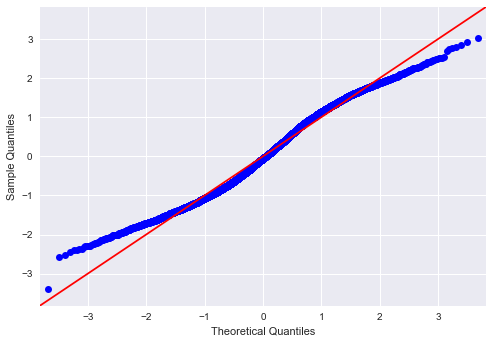

In [158]:
# QQ-Plot
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [ ]:
#This looks at residual distributions for individual features(predictors)
#Remember to stop this cell manually if you don't run through each feature (pressing enter)
results = []
for idx, column in enumerate(df2_mid.columns):
    print (f"regression for king county housing for mid income~{column}")

    f = f'price~{column}'
    model = ols(formula=f, data=df2_mid).fit()
    
    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()
    
    results.append([column, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])
    input("Press Enter to continue...")

### Approach B

Our second approach took a previous df (df2_low - 20,452 x 39) and cut it down to a low end price range of $154K to $315K. Had dummies for 4 variables (condition, grade, bedrooms, bath-rooms).

In [185]:
# Create dummies for grade
grade_dummies = pd.get_dummies(df2['grade'], prefix='grade', drop_first=True)
df2 = pd.concat([df2, grade_dummies], axis=1)
df2.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         0.0   0.0          3      7        1180   
1      7242     2.0         0.0   0.0          3      7        2170   
2     10000     1.0         0.0   0.0          3      6         770   
3      5000     1.0         0.0   0.0          5      7        1050   
4      8080     1.0         0.0   0.0          3      8        1680   

  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0           0.0      1955           0.0    98178  47.5112 -122.257   
1         400.0      1951        1991.0    98125  47.7210 -122.319   
2           0.0      1933           0.0    98028  47.7379 -122.233   
3         910.0      1965           0.0    98136  47.5208 -122.393   
4           0.0      1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  grade_4  grade_5  grade_6  grade_7  grade_8  \
0           1340        5650        0        0        0        1        0   
1           1690        7639        0        0        0        1        0   
2           2720        8062        0        0        1        0        0   
3           1360        5000        0        0        0        1        0   
4           1800        7503        0        0        0        0        1   

   grade_9  grade_10  grade_11  grade_12  
0        0         0         0         0  
1        0         0         0         0  
2        0         0         0         0  
3        0         0         0         0  
4        0         0         0         0

In [186]:
# Cut outliers for bathroom, then create dummies
# Went up to around 8.0 with 1 count so we removed those values
df2 = df2[(np.abs(stats.zscore(df2['bathrooms']) < 2))]
df2['bathrooms'].value_counts()

2.50    5270
1.00    3849
1.75    3029
2.25    1988
2.00    1917
1.50    1439
2.75    1134
3.00     695
3.50     585
3.25     463
0.75      71
1.25       8
0.50       4
Name: bathrooms, dtype: int64

In [187]:
# Create dummies for bathrooms
bathrooms_dummies = pd.get_dummies(df2['bathrooms'], prefix='bath', drop_first=True)
# df2_remove = train4.drop(['OverallQual'], axis=1)
df2 = pd.concat([df2, bathrooms_dummies], axis=1)
df2.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         0.0   0.0          3      7        1180   
1      7242     2.0         0.0   0.0          3      7        2170   
2     10000     1.0         0.0   0.0          3      6         770   
3      5000     1.0         0.0   0.0          5      7        1050   
4      8080     1.0         0.0   0.0          3      8        1680   

  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0           0.0      1955           0.0    98178  47.5112 -122.257   
1         400.0      1951        1991.0    98125  47.7210 -122.319   
2           0.0      1933           0.0    98028  47.7379 -122.233   
3         910.0      1965           0.0    98136  47.5208 -122.393   
4           0.0      1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  grade_4  grade_5  grade_6  grade_7  grade_8  \
0           1340        5650        0        0        0        1        0   
1           1690        7639        0        0        0        1        0   
2           2720        8062        0        0        1        0        0   
3           1360        5000        0        0        0        1        0   
4           1800        7503        0        0        0        0        1   

   grade_9  grade_10  grade_11  grade_12  bath_0.75  bath_1.0  bath_1.25  \
0        0         0         0         0          0         1          0   
1        0         0         0         0          0         0          0   
2        0         0         0         0          0         1          0   
3        0         0         0         0          0         0          0   
4        0         0         0         0          0         0          0   

   bath_1.5  bath_1.75  bath_2.0  bath_2.25  bath_2.5  bath_2.75  bath_3.0  \
0         0          0         0          0         0          0         0   
1         0          0         0          1         0          0         0   
2         0          0         0          0         0          0         0   
3         0          0         0          0         0          0         1   
4         0          0         1          0         0          0         0   

   bath_3.25  bath_3.5  
0          0         0  
1          0         0  
2          0         0  
3          0         0  
4          0         0

In [188]:
df2 = df2.drop(['bathrooms', 'grade'], axis=1)
pd.set_option('display.max_columns', None)

In [68]:
df2.head(2)

id        date     price  bedrooms  sqft_living  sqft_lot  floors  \
0  7129300520  10/13/2014  221900.0         3         1180      5650     1.0   
1  6414100192   12/9/2014  538000.0         3         2570      7242     2.0   

   waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0         0.0   0.0          3        1180            0.0      1955   
1         0.0   0.0          3        2170          400.0      1951   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0           0.0    98178  47.5112 -122.257           1340        5650   
1        1991.0    98125  47.7210 -122.319           1690        7639   

   grade_4  grade_5  grade_6  grade_7  grade_8  grade_9  grade_10  grade_11  \
0        0        0        0        1        0        0         0         0   
1        0        0        0        1        0        0         0         0   

   grade_12  bath_0.75  bath_1.0  bath_1.25  bath_1.5  bath_1.75  bath_2.0  \
0         0          0         1          0         0          0         0   
1         0          0         0          0         0          0         0   

   bath_2.25  bath_2.5  bath_2.75  bath_3.0  bath_3.25  bath_3.5  bath_3.75  \
0          0         0          0         0          0         0          0   
1          1         0          0         0          0         0          0   

   bath_4.0  bath_4.25  
0         0          0  
1         0          0

In [189]:
# Had to convert the "." to "_" because when selecting these specific dummy columns we use invalid syntax
# when using "." in a variable/column name.
df2 = df2.rename(columns={'bath_0.75':'bath_0_75', 'bath_1.0':'bath_1_0', 'bath_1.25':'bath_1_25', \
                                        'bath_1.5':'bath_1_5', 'bath_1.75':'bath_1_75', 'bath_2.0':'bath_2_0', \
                                        'bath_2.25':'bath_2_25', 'bath_2.5':'bath_2_5', 'bath_2.75':'bath_2_75', \
                                        'bath_3.0':'bath_3_0', 'bath_3.25':'bath_3_25', 'bath_3.5':'bath_3_5'})

In [190]:
# Create dummies for condition
condition_dummies = pd.get_dummies(df2['condition'], prefix='cond', drop_first=True)
df2 = pd.concat([df2, condition_dummies], axis=1)
df2.head()

id        date     price  bedrooms  sqft_living  sqft_lot  floors  \
0  7129300520  10/13/2014  221900.0         3         1180      5650     1.0   
1  6414100192   12/9/2014  538000.0         3         2570      7242     2.0   
2  5631500400   2/25/2015  180000.0         2          770     10000     1.0   
3  2487200875   12/9/2014  604000.0         4         1960      5000     1.0   
4  1954400510   2/18/2015  510000.0         3         1680      8080     1.0   

   waterfront  view  condition  sqft_above sqft_basement  yr_built  \
0         0.0   0.0          3        1180           0.0      1955   
1         0.0   0.0          3        2170         400.0      1951   
2         0.0   0.0          3         770           0.0      1933   
3         0.0   0.0          5        1050         910.0      1965   
4         0.0   0.0          3        1680           0.0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0           0.0    98178  47.5112 -122.257           1340        5650   
1        1991.0    98125  47.7210 -122.319           1690        7639   
2           0.0    98028  47.7379 -122.233           2720        8062   
3           0.0    98136  47.5208 -122.393           1360        5000   
4           0.0    98074  47.6168 -122.045           1800        7503   

   grade_4  grade_5  grade_6  grade_7  grade_8  grade_9  grade_10  grade_11  \
0        0        0        0        1        0        0         0         0   
1        0        0        0        1        0        0         0         0   
2        0        0        1        0        0        0         0         0   
3        0        0        0        1        0        0         0         0   
4        0        0        0        0        1        0         0         0   

   grade_12  bath_0_75  bath_1_0  bath_1_25  bath_1_5  bath_1_75  bath_2_0  \
0         0          0         1          0         0          0         0   
1         0          0         0          0         0          0         0   
2         0          0         1          0         0          0         0   
3         0          0         0          0         0          0         0   
4         0          0         0          0         0          0         1   

   bath_2_25  bath_2_5  bath_2_75  bath_3_0  bath_3_25  bath_3_5  cond_2  \
0          0         0          0         0          0         0       0   
1          1         0          0         0          0         0       0   
2          0         0          0         0          0         0       0   
3          0         0          0         1          0         0       0   
4          0         0          0         0          0         0       0   

   cond_3  cond_4  cond_5  
0       1       0       0  
1       1       0       0  
2       1       0       0  
3       0       0       1  
4       1       0       0

In [191]:
# Create dummies for bedrooms
bedrooms_dummies = pd.get_dummies(df2['bedrooms'], prefix='bed', drop_first=True)
df2 = pd.concat([df2, bedrooms_dummies], axis=1)
df2.head()

id        date     price  bedrooms  sqft_living  sqft_lot  floors  \
0  7129300520  10/13/2014  221900.0         3         1180      5650     1.0   
1  6414100192   12/9/2014  538000.0         3         2570      7242     2.0   
2  5631500400   2/25/2015  180000.0         2          770     10000     1.0   
3  2487200875   12/9/2014  604000.0         4         1960      5000     1.0   
4  1954400510   2/18/2015  510000.0         3         1680      8080     1.0   

   waterfront  view  condition  sqft_above sqft_basement  yr_built  \
0         0.0   0.0          3        1180           0.0      1955   
1         0.0   0.0          3        2170         400.0      1951   
2         0.0   0.0          3         770           0.0      1933   
3         0.0   0.0          5        1050         910.0      1965   
4         0.0   0.0          3        1680           0.0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0           0.0    98178  47.5112 -122.257           1340        5650   
1        1991.0    98125  47.7210 -122.319           1690        7639   
2           0.0    98028  47.7379 -122.233           2720        8062   
3           0.0    98136  47.5208 -122.393           1360        5000   
4           0.0    98074  47.6168 -122.045           1800        7503   

   grade_4  grade_5  grade_6  grade_7  grade_8  grade_9  grade_10  grade_11  \
0        0        0        0        1        0        0         0         0   
1        0        0        0        1        0        0         0         0   
2        0        0        1        0        0        0         0         0   
3        0        0        0        1        0        0         0         0   
4        0        0        0        0        1        0         0         0   

   grade_12  bath_0_75  bath_1_0  bath_1_25  bath_1_5  bath_1_75  bath_2_0  \
0         0          0         1          0         0          0         0   
1         0          0         0          0         0          0         0   
2         0          0         1          0         0          0         0   
3         0          0         0          0         0          0         0   
4         0          0         0          0         0          0         1   

   bath_2_25  bath_2_5  bath_2_75  bath_3_0  bath_3_25  bath_3_5  cond_2  \
0          0         0          0         0          0         0       0   
1          1         0          0         0          0         0       0   
2          0         0          0         0          0         0       0   
3          0         0          0         1          0         0       0   
4          0         0          0         0          0         0       0   

   cond_3  cond_4  cond_5  bed_2  bed_3  bed_4  bed_5  bed_6  bed_7  bed_8  \
0       1       0       0      0      1      0      0      0      0      0   
1       1       0       0      0      1      0      0      0      0      0   
2       1       0       0      1      0      0      0      0      0      0   
3       0       0       1      0      0      1      0      0      0      0   
4       1       0       0      0      1      0      0      0      0      0   

   bed_9  bed_10  bed_11  
0      0       0       0  
1      0       0       0  
2      0       0       0  
3      0       0       0  
4      0       0       0

In [192]:
df2 = df2.drop(['condition', 'bedrooms'], axis=1)

In [193]:
#Drop unnecessary columns
df2 = df2.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis=1)

In [74]:
df2.head(2)

price  sqft_living  sqft_lot  floors  waterfront  view  sqft_above  \
0  221900.0         1180      5650     1.0         0.0   0.0        1180   
1  538000.0         2570      7242     2.0         0.0   0.0        2170   

   sqft_basement  yr_built  yr_renovated  sqft_living15  sqft_lot15  grade_4  \
0            0.0      1955           0.0           1340        5650        0   
1          400.0      1951        1991.0           1690        7639        0   

   grade_5  grade_6  grade_7  grade_8  grade_9  grade_10  grade_11  grade_12  \
0        0        0        1        0        0         0         0         0   
1        0        0        1        0        0         0         0         0   

   bath_0_75  bath_1_0  bath_1_25  bath_1_5  bath_1_75  bath_2_0  bath_2_25  \
0          0         1          0         0          0         0          0   
1          0         0          0         0          0         0          1   

   bath_2_5  bath_2_75  bath_3_0  bath_3_25  bath_3_5  bath_3.75  bath_4.0  \
0         0          0         0          0         0          0         0   
1         0          0         0          0         0          0         0   

   bath_4.25  cond_2  cond_3  cond_4  cond_5  bed_2  bed_3  bed_4  bed_5  \
0          0       0       1       0       0      0      1      0      0   
1          0       0       1       0       0      0      1      0      0   

   bed_6  bed_7  bed_8  bed_9  bed_10  bed_11  bed_33  
0      0      0      0      0       0       0       0  
1      0      0      0      0       0       0       0

In [194]:
#Create a low priced df, values decided off of the median and a low end cut off. We would look at reasonably low houses
#not too low such as $50,000.
df3 = df2.loc[(df2['price'] >= 154000) & (df2['price'] <= 315000)]

In [195]:
# Cut years outliers on low end (only include if >1940)
df3 = df3.loc[df3['yr_built'] > 1940]
df3.shape

(4379, 47)

In [170]:
# Look at descriptives for new df with +- 2 SD bands added
df3.describe()
desc_df = df3.describe()
desc_df.loc['+2_std'] = desc_df.loc['mean'] + (desc_df.loc['std']*2)
desc_df.loc['-2_std'] = desc_df.loc['mean'] - (desc_df.loc['std']*2)
desc_df

price  sqft_living       sqft_lot       floors   waterfront  \
count     4379.000000  4379.000000    4379.000000  4379.000000  3896.000000   
mean    254876.091573  1506.313999    9689.443709     1.284654     0.000257   
std      39819.607680   447.856694   13555.403862     0.462610     0.016021   
min     154000.000000   380.000000     572.000000     1.000000     0.000000   
25%     226000.000000  1180.000000    6229.500000     1.000000     0.000000   
50%     260000.000000  1470.000000    7904.000000     1.000000     0.000000   
75%     288000.000000  1800.000000    9690.500000     2.000000     0.000000   
max     315000.000000  3340.000000  306848.000000     3.000000     1.000000   
+2_std  334515.306933  2402.027387   36800.251433     2.209875     0.032299   
-2_std  175236.876214   610.600611  -17421.364015     0.359433    -0.031785   

               view   sqft_above     yr_built  yr_renovated  sqft_living15  \
count   4367.000000  4379.000000  4379.000000   3622.000000    4379.000000   
mean       0.032517  1348.428408  1973.355561     30.304804    1577.761818   
std        0.266199   400.816978    19.645577    244.092523     379.295980   
min        0.000000   380.000000  1941.000000      0.000000     620.000000   
25%        0.000000  1060.000000  1958.000000      0.000000    1300.000000   
50%        0.000000  1280.000000  1970.000000      0.000000    1540.000000   
75%        0.000000  1587.000000  1989.000000      0.000000    1810.000000   
max        3.000000  3340.000000  2015.000000   2014.000000    3557.000000   
+2_std     0.564914  2150.062363  2012.646715    518.489850    2336.353778   
-2_std    -0.499881   546.794453  1934.064407   -457.880242     819.169858   

           sqft_lot15      grade_4      grade_5      grade_6      grade_7  \
count     4379.000000  4379.000000  4379.000000  4379.000000  4379.000000   
mean      9523.922128     0.001370     0.016670     0.189541     0.656314   
std      14090.845644     0.036995     0.128048     0.391983     0.474992   
min        651.000000     0.000000     0.000000     0.000000     0.000000   
25%       6437.000000     0.000000     0.000000     0.000000     0.000000   
50%       7915.000000     0.000000     0.000000     0.000000     1.000000   
75%       9484.500000     0.000000     0.000000     0.000000     1.000000   
max     392040.000000     1.000000     1.000000     1.000000     1.000000   
+2_std   37705.613416     0.075360     0.272767     0.973506     1.606298   
-2_std  -18657.769159    -0.072619    -0.239426    -0.594424    -0.293670   

            grade_8      grade_9  grade_10  grade_11  grade_12    bath_0_75  \
count   4379.000000  4379.000000    4379.0    4379.0    4379.0  4379.000000   
mean       0.130395     0.005709       0.0       0.0       0.0     0.005481   
std        0.336776     0.075351       0.0       0.0       0.0     0.073837   
min        0.000000     0.000000       0.0       0.0       0.0     0.000000   
25%        0.000000     0.000000       0.0       0.0       0.0     0.000000   
50%        0.000000     0.000000       0.0       0.0       0.0     0.000000   
75%        0.000000     0.000000       0.0       0.0       0.0     0.000000   
max        1.000000     1.000000       0.0       0.0       0.0     1.000000   
+2_std     0.803947     0.156411       0.0       0.0       0.0     0.153155   
-2_std    -0.543157    -0.144993       0.0       0.0       0.0    -0.142193   

           bath_1_0  bath_1_25     bath_1_5    bath_1_75     bath_2_0  \
count   4379.000000     4379.0  4379.000000  4379.000000  4379.000000   
mean       0.305092        0.0     0.113268     0.168532     0.112126   
std        0.460499        0.0     0.316956     0.374380     0.315558   
min        0.000000        0.0     0.000000     0.000000     0.000000   
25%        0.000000        0.0     0.000000     0.000000     0.000000   
50%        0.000000        0.0     0.000000     0.000000     0.000000   
75%        1.000000        0.0     0.000000     0.000000  

In [78]:
df3.head(2)

price  sqft_living  sqft_lot  floors  waterfront  view  sqft_above  \
0  221900.0         1180      5650     1.0         0.0   0.0        1180   
6  257500.0         1715      6819     2.0         0.0   0.0        1715   

   sqft_basement  yr_built  yr_renovated  sqft_living15  sqft_lot15  grade_4  \
0            0.0      1955           0.0           1340        5650        0   
6            0.0      1995           0.0           2238        6819        0   

   grade_5  grade_6  grade_7  grade_8  grade_9  grade_10  grade_11  grade_12  \
0        0        0        1        0        0         0         0         0   
6        0        0        1        0        0         0         0         0   

   bath_0_75  bath_1_0  bath_1_25  bath_1_5  bath_1_75  bath_2_0  bath_2_25  \
0          0         1          0         0          0         0          0   
6          0         0          0         0          0         0          1   

   bath_2_5  bath_2_75  bath_3_0  bath_3_25  bath_3_5  bath_3.75  bath_4.0  \
0         0          0         0          0         0          0         0   
6         0          0         0          0         0          0         0   

   bath_4.25  cond_2  cond_3  cond_4  cond_5  bed_2  bed_3  bed_4  bed_5  \
0          0       0       1       0       0      0      1      0      0   
6          0       0       1       0       0      0      1      0      0   

   bed_6  bed_7  bed_8  bed_9  bed_10  bed_11  bed_33  
0      0      0      0      0       0       0       0  
6      0      0      0      0       0       0       0

In [196]:
# Check for duplicates
duplicate_rows_df = df3[df3.duplicated()]
print(duplicate_rows_df.shape)
duplicate_rows_df

(1, 47)


price  sqft_living  sqft_lot  floors  waterfront  view  sqft_above  \
4348  259950.0         1070       649     2.0         0.0   0.0         720   

     sqft_basement  yr_built  yr_renovated  sqft_living15  sqft_lot15  \
4348         350.0      2008           0.0           1070         928   

      grade_4  grade_5  grade_6  grade_7  grade_8  grade_9  grade_10  \
4348        0        0        0        0        0        1         0   

      grade_11  grade_12  bath_0_75  bath_1_0  bath_1_25  bath_1_5  bath_1_75  \
4348         0         0          0         0          0         0          0   

      bath_2_0  bath_2_25  bath_2_5  bath_2_75  bath_3_0  bath_3_25  bath_3_5  \
4348         1          0         0          0         0          0         0   

      cond_2  cond_3  cond_4  cond_5  bed_2  bed_3  bed_4  bed_5  bed_6  \
4348       0       1       0       0      1      0      0      0      0   

      bed_7  bed_8  bed_9  bed_10  bed_11  
4348      0      0      0       0       0

(array([0.01989095, 0.00795638, 0.0155427 , 0.01137948, 0.01665289,
        0.01646786, 0.0184107 , 0.01896579, 0.02599701, 0.00832645,
        0.0333983 , 0.01359986, 0.00915909, 0.00814141, 0.01387741,
        0.02497934, 0.00758632, 0.01508012, 0.01202709, 0.01813315,
        0.00906657, 0.01591276, 0.00527342, 0.00777135, 0.00545845,
        0.01702296, 0.00934412, 0.01008425, 0.00490335, 0.00499587]),
 array([1941.        , 1943.46666667, 1945.93333333, 1948.4       ,
        1950.86666667, 1953.33333333, 1955.8       , 1958.26666667,
        1960.73333333, 1963.2       , 1965.66666667, 1968.13333333,
        1970.6       , 1973.06666667, 1975.53333333, 1978.        ,
        1980.46666667, 1982.93333333, 1985.4       , 1987.86666667,
        1990.33333333, 1992.8       , 1995.26666667, 1997.73333333,
        2000.2       , 2002.66666667, 2005.13333333, 2007.6       ,
        2010.06666667, 2012.53333333, 2015.        ]),
 <a list of 1 Patch objects>)

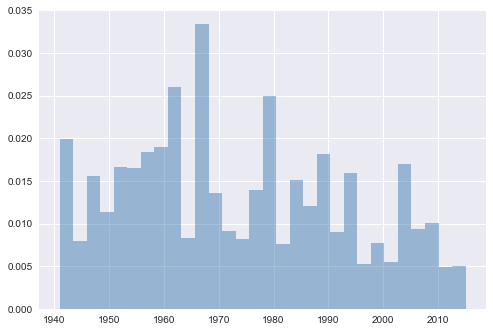

In [80]:
# Examine yr_built data via histogram...
plt.hist(df3.yr_built, bins=30, density=True, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none')

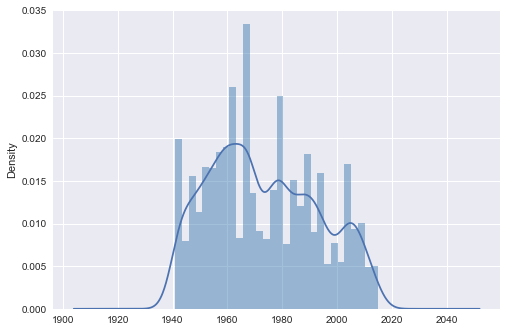

In [81]:
# Examine yr_built data via histogram...
plt.hist(df3.yr_built, bins=30, density=True, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none')
df3['yr_built'].plot.kde(label ='kde')

In [ ]:
# save df3 as csv file
df3.to_csv(r'data/df3clean.csv')

In [197]:
# Create train, text split
train, test = train_test_split(df3, test_size=0.25, random_state=42)

In [198]:
train.shape

(3284, 47)

In [199]:
from statsmodels.formula.api import ols
f = 'price~grade_6+grade_7+grade_8+sqft_living+bed_2+bed_3+bed_4'
# create a fitted model in one line
model = ols(formula=f, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     83.93
Date:                Sun, 29 Nov 2020   Prob (F-statistic):          1.37e-112
Time:                        14:24:21   Log-Likelihood:                -39184.
No. Observations:                3284   AIC:                         7.838e+04
Df Residuals:                    3276   BIC:                         7.843e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.946e+05   5867.285     33.175      0.000    1.83e+05    2.06e+05
grade_6      -233.8749   4363.136     -0.054      0.957   -8788.626    8320.876
grade_7      9034.7580   4210.551      2.146      0.032     779.179    1.73e+04
grade_8      1.626e+04   4587.610      3.545      0.000    7267.145    2.53e+04
sqft_living    31.0042      1.921     16.140      0.000      27.238      34.771
bed_2        1.218e+04   3882.032      3.137      0.002    4565.131    1.98e+04
bed_3        4984.7312   3379.697      1.475      0.140   -1641.802    1.16e+04
bed_4        3710.9878   3479.060      1.067      0.286   -3110.365    1.05e+04
==============================================================================
Omnibus:                       66.208   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.455
Skew:                          -0.278   Prob(JB):                     1.23e-13
Kurtosis:                       2.645   Cond. No.                     2.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [200]:
# Split data into x and y versions of train and test
y_test = test[['price']]
X_test = test.drop(['price'],axis=1)
y_train = train[['price']]
X_train = train.drop(['price'],axis=1)

In [201]:
# Try and baseline this to the test data set (before changes)
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [202]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('Train Root Mean Squarred Error:', train_mse**0.5)
print('Test Root Mean Squarred Error:', test_mse**0.5)

Train Root Mean Squarred Error: 35566.276817254875
Test Root Mean Squarred Error: 35041.22814893627


### Approach C

At this point, we were still using df6_low (10,013 x 21); and decided to try to do some transformations on the data to see if that would help. We logged (np.log) grade. And then performed min-max scaling on most of the other predictor variables (13) with the exception of price, yr_built, and yr_renovated.

In [203]:
dfx = pd.read_csv('data/kc_house_data.csv')

In [204]:
dfx['sqft_basement'] = pd.to_numeric(dfx['sqft_basement'], errors='coerce')
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


None

In [205]:
# Change nulls to 0 for 4 columns
dfy = dfx.replace(np.NaN, 0.0)
display(dfy.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [206]:
# get rid of outliers for price (2 SD from mean)
dfz = dfy[(np.abs(stats.zscore(dfy['price']) < 2))]

In [207]:
dfz = dfz.loc[dfz['bedrooms'] < 33]

In [208]:
# Cut outliers for bathroom
df5 = dfz[(np.abs(stats.zscore(dfz['bathrooms']) < 2))]
df5['bathrooms'].value_counts()

2.50    5270
1.00    3849
1.75    3029
2.25    1988
2.00    1917
1.50    1439
2.75    1134
3.00     695
3.50     585
3.25     463
0.75      71
1.25       8
0.50       4
Name: bathrooms, dtype: int64

In [209]:
# Create the low priced df... use < 438K and also > 154K, based off median
df6_low = df5.loc[(df5['price'] >= 154000) & (df5['price'] <= 438000)]
df6_low.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
6  1321400060   6/27/2014  257500.0         3       2.25         1715   
7  2008000270   1/15/2015  291850.0         3       1.50         1060   
8  2414600126   4/15/2015  229500.0         3       1.00         1780   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         0.0   0.0          3      7        1180   
2     10000     1.0         0.0   0.0          3      6         770   
6      6819     2.0         0.0   0.0          3      7        1715   
7      9711     1.0         0.0   0.0          3      7        1060   
8      7470     1.0         0.0   0.0          3      7        1050   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0            0.0      1955           0.0    98178  47.5112 -122.257   
2            0.0      1933           0.0    98028  47.7379 -122.233   
6            0.0      1995           0.0    98003  47.3097 -122.327   
7            0.0      1963           0.0    98198  47.4095 -122.315   
8          730.0      1960           0.0    98146  47.5123 -122.337   

   sqft_living15  sqft_lot15  
0           1340        5650  
2           2720        8062  
6           2238        6819  
7           1650        9711  
8           1780        8113

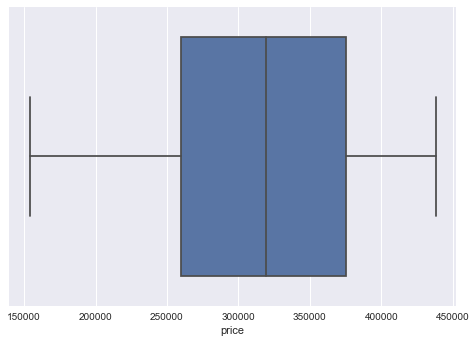

In [95]:
sns.boxplot(x=df6_low['price'])

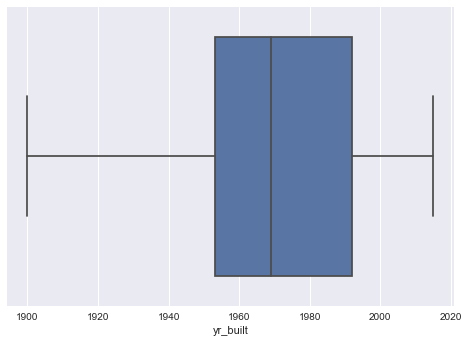

In [96]:
sns.boxplot(x=df6_low['yr_built'])

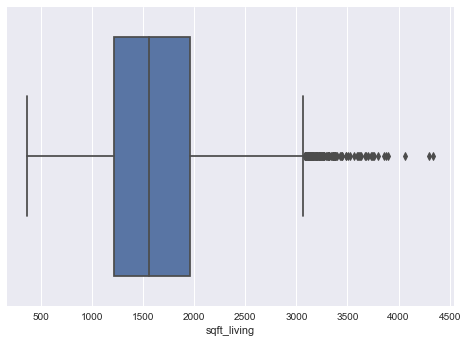

In [97]:
sns.boxplot(x=df6_low['sqft_living'])

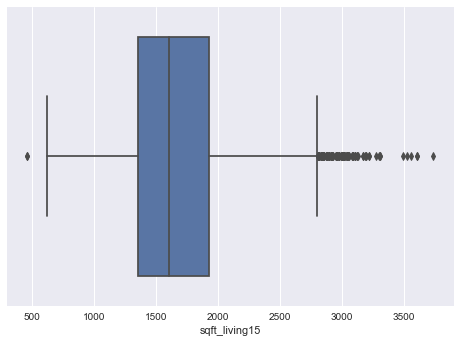

In [98]:
sns.boxplot(x=df6_low['sqft_living15'])

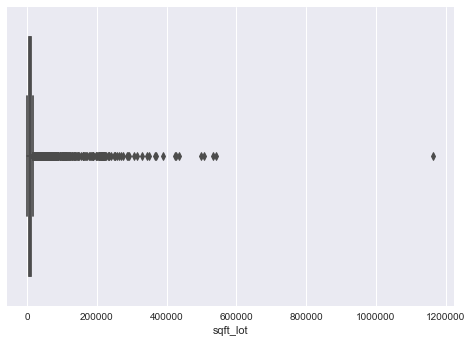

In [99]:
sns.boxplot(x=df6_low['sqft_lot'])

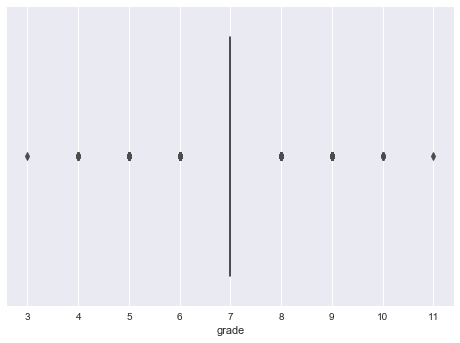

In [100]:
sns.boxplot(x=df6_low['grade'])

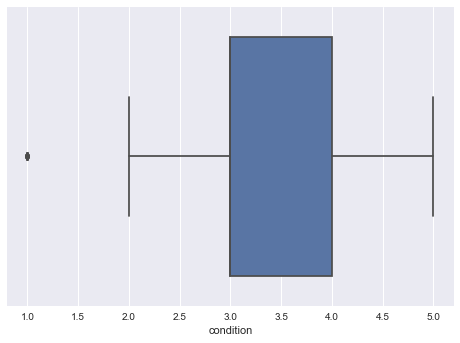

In [101]:
sns.boxplot(x=df6_low['condition'])

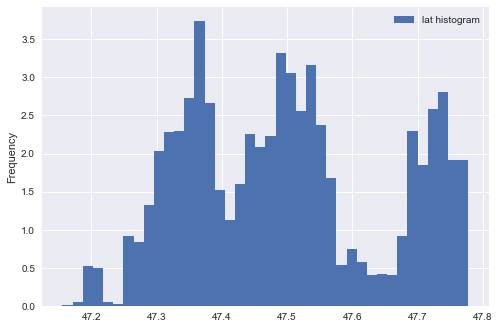

In [102]:
df6_low.lat.plot.hist(density=True, bins=40, label = 'lat histogram')
plt.legend()
plt.show()

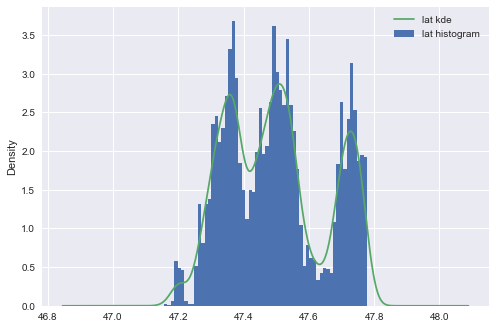

In [103]:
df6_low.lat.plot.hist(density=True, bins=60, label = 'lat histogram')
df6_low.lat.plot.kde(label ='lat kde')
plt.legend()
plt.show()

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


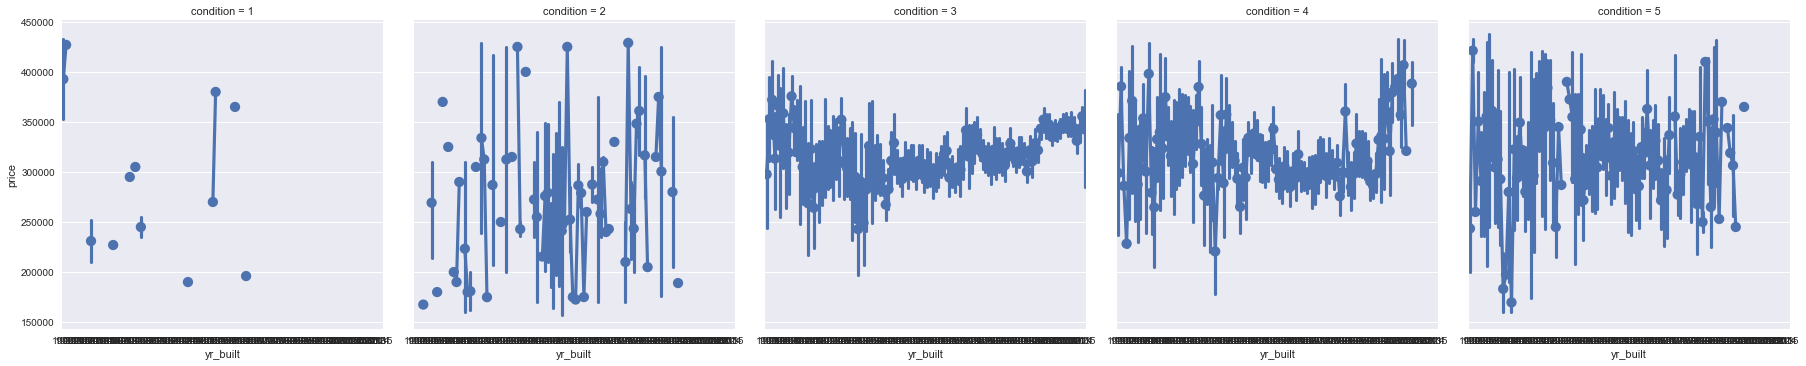

In [104]:
#Exploring different plots
sns.factorplot(data=df6_low, x= "yr_built", y="price", col="condition")

(0, 500000)

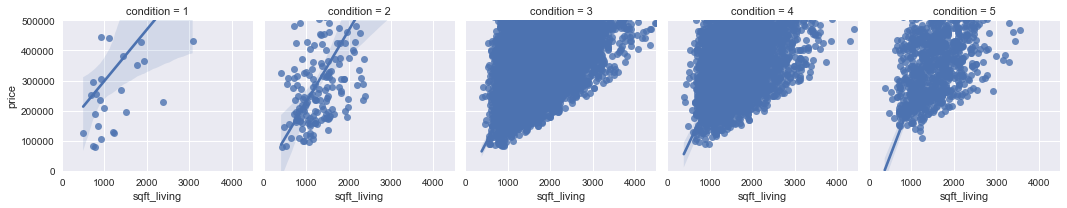

In [105]:
g = sns.FacetGrid(df, col="condition") 
g.map(sns.regplot, "sqft_living", "price") 
plt.xlim(0, 4500) 
plt.ylim(0, 500000)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3a66e5c0>,
      dtype=object)

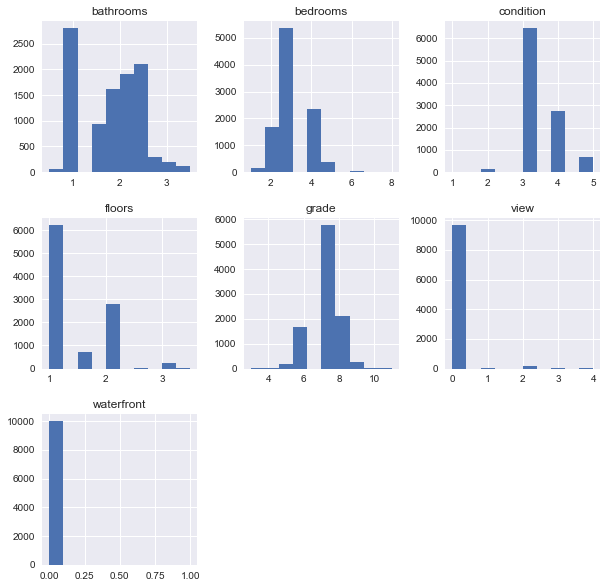

In [106]:
df6_low[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'grade', 'condition']].hist(figsize  = [10, 10])

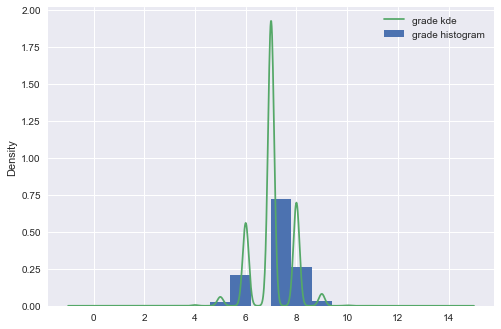

In [108]:
df6_low.grade.plot.hist(density=True, label = 'grade histogram')
df6_low.grade.plot.kde(label ='grade kde')
plt.legend()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3af74978>,
      dtype=object)

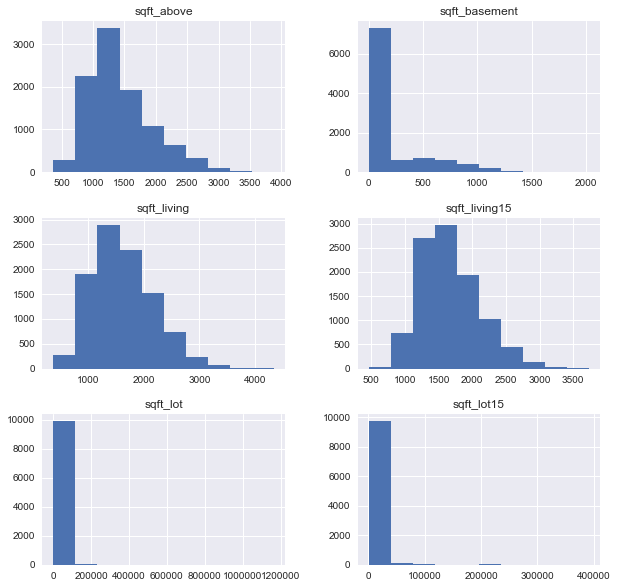

In [109]:
df6_low[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']].hist(figsize  = [10, 10])

In [111]:
df6_low['sqft_lot'].max()

1164794

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3b02f5c0>,
      dtype=object)

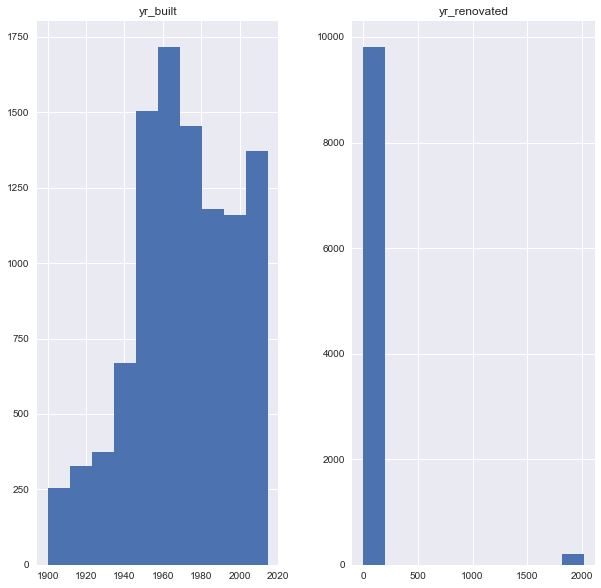

In [113]:
df6_low[['yr_built', 'yr_renovated']].hist(figsize  = [10, 10])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a41e77198>]],
      dtype=object)

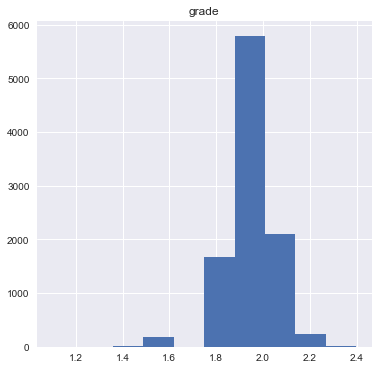

In [213]:
#Testing how log transmations would change feature distributions (visually)
#Yr_built seems to become more normal
data_log = pd.DataFrame([])
data_log['grade'] = np.log(df6_low['grade'])
data_log.hist(figsize  = [6, 6])

In [214]:
#Transforming(log transformation) and min max scaling grade
df0 = pd.DataFrame()
log_grade = data_log['grade']
scaled_grade = (log_grade - min(log_grade)) / (max(log_grade) - min(log_grade))
df0['sc_grade'] = scaled_grade

#Scaling the rest features so they are all on the same scale.
scaled_bath = (df6_low['bathrooms'] - min(df6_low['bathrooms'])) / (max(df6_low['bathrooms']) - min(df6_low['bathrooms']))
df0['sc_bath'] = scaled_bath

scaled_bed = (df6_low['bedrooms'] - min(df6_low['bedrooms'])) / (max(df6_low['bedrooms']) - min(df6_low['bedrooms']))
df0['sc_bed'] = scaled_bed

scaled_cond = (df6_low['condition'] - min(df6_low['condition'])) / (max(df6_low['condition']) - min(df6_low['condition']))
df0['sc_cond'] = scaled_cond

scaled_floor = (df6_low['floors'] - min(df6_low['floors'])) / (max(df6_low['floors']) - min(df6_low['floors']))
df0['sc_floor'] = scaled_floor

scaled_view = (df6_low['view'] - min(df6_low['view'])) / (max(df6_low['view']) - min(df6_low['view']))
df0['sc_view'] = scaled_view

scaled_waterfront = (df6_low['waterfront'] - min(df6_low['waterfront'])) / (max(df6_low['waterfront']) - min(df6_low['waterfront']))
df0['sc_waterfront'] = scaled_waterfront

scaled_living = (df6_low['sqft_living'] - min(df6_low['sqft_living'])) / (max(df6_low['sqft_living']) - min(df6_low['sqft_living']))
df0['sc_living'] = scaled_living

scaled_living15 = (df6_low['sqft_living15'] - min(df6_low['sqft_living15'])) / (max(df6_low['sqft_living15']) - min(df6_low['sqft_living15']))
df0['sc_living15'] = scaled_living15

scaled_lot15 = (df6_low['sqft_lot15'] - min(df6_low['sqft_lot15'])) / (max(df6_low['sqft_lot15']) - min(df6_low['sqft_lot15']))
df0['sc_lot15'] = scaled_lot15

scaled_lot = (df6_low['sqft_lot'] - min(df6_low['sqft_lot'])) / (max(df6_low['sqft_lot']) - min(df6_low['sqft_lot']))
df0['sc_lot'] = scaled_lot

scaled_above = (df6_low['sqft_above'] - min(df6_low['sqft_above'])) / (max(df6_low['sqft_above']) - min(df6_low['sqft_above']))
df0['sc_above'] = scaled_above

scaled_basement = (df6_low['sqft_basement'] - min(df6_low['sqft_basement'])) / (max(df6_low['sqft_basement']) - min(df6_low['sqft_basement']))
df0['sc_basement'] = scaled_basement

In [216]:
#Adding original price, year built and year renovated without scaling.
df0['price'] = df6_low['price']
df0['yr_built'] = df6_low['yr_built']
df0['lat'] = df6_low['lat']
df0['zipcode'] = df6_low['zipcode']

In [217]:
#Inspect the new data frame (df0)
df0.head()

sc_grade   sc_bath    sc_bed  sc_cond  sc_floor  sc_view  sc_waterfront  \
0  0.652127  0.166667  0.285714      0.5       0.0      0.0            0.0   
2  0.533484  0.166667  0.142857      0.5       0.0      0.0            0.0   
6  0.652127  0.583333  0.285714      0.5       0.4      0.0            0.0   
7  0.652127  0.333333  0.285714      0.5       0.0      0.0            0.0   
8  0.652127  0.166667  0.285714      0.5       0.0      0.0            0.0   

   sc_living  sc_living15  sc_lot15    sc_lot  sc_above  sc_basement  \
0   0.204030     0.268293  0.012772  0.004362  0.230769     0.000000   
2   0.100756     0.689024  0.018935  0.008098  0.113960     0.000000   
6   0.338791     0.542073  0.015759  0.005366  0.383191     0.000000   
7   0.173804     0.362805  0.023148  0.007850  0.196581     0.000000   
8   0.355164     0.402439  0.019065  0.005925  0.193732     0.359606   

      price  yr_built      lat  zipcode  
0  221900.0      1955  47.5112    98178  
2  180000.0      1933  47.7379    98028  
6  257500.0      1995  47.3097    98003  
7  291850.0      1963  47.4095    98198  
8  229500.0      1960  47.5123    98146

In [219]:
train, test = train_test_split(df0, test_size=0.25, random_state=42)

In [220]:
train.shape

(7509, 17)

In [224]:
outcome = 'price'
predictors = train.drop(['price', 'sc_waterfront', 'sc_basement', 'sc_lot15', 'sc_above', \
                        'sc_bath', 'sc_bed', 'lat', 'zipcode'], axis=1)
pred_sum = "+".join(predictors) 
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=train).fit()

In [225]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     214.7
Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:50:00   Log-Likelihood:                -93863.
No. Observations:                7509   AIC:                         1.877e+05
Df Residuals:                    7500   BIC:                         1.878e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.166e+06   7.49e+04     15.574      0.000    1.02e+06    1.31e+06
sc_grade     2.341e+05    1.2e+04     19.442      0.000     2.1e+05    2.58e+05
sc_cond      7482.9065   4963.447      1.508      0.132   -2246.841    1.72e+04
sc_floor     6.211e+04   4538.574     13.685      0.000    5.32e+04     7.1e+04
sc_view      3.178e+04   7784.313      4.083      0.000    1.65e+04     4.7e+04
sc_living    6.554e+04   7815.771      8.386      0.000    5.02e+04    8.09e+04
sc_living15  5.761e+04   7877.165      7.313      0.000    4.22e+04     7.3e+04
sc_lot       1.706e+05   3.58e+04      4.771      0.000       1e+05    2.41e+05
yr_built     -538.6158     39.340    -13.691      0.000    -615.733    -461.499
==============================================================================
Omnibus:                      419.509   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.000
Skew:                           0.072   Prob(JB):                     2.44e-36
Kurtosis:                       2.291   Cond. No.                     1.97e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


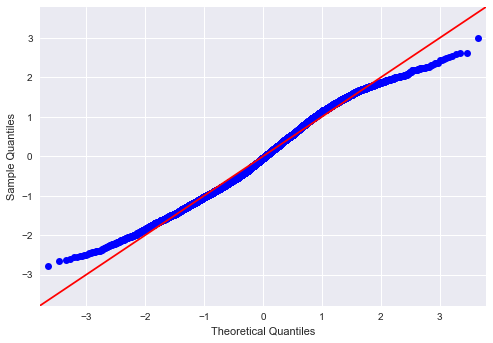

In [226]:
# QQ Plot
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

Text(0.5, 0.99, 'Residuals Scatterplot')

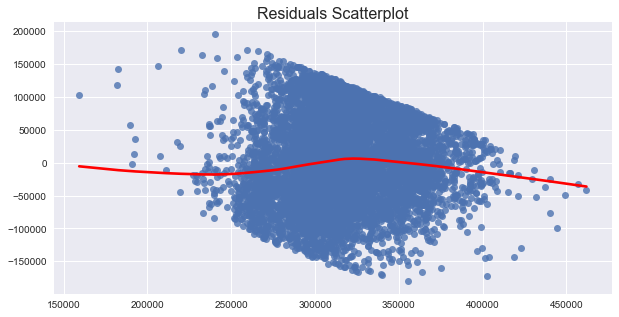

In [227]:
plt.figure(figsize=(10,5))
sns.regplot(x=model.predict(), y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot', fontsize=16, y=.99)

### Approach D

At this point (Saturday afternoon - df7), we thought more about a few of the variables we had been leaving out - location - lat, long, zipcode. Based on looking at maps of where the sales were located, we could see a pretty clear relationship between home price and latitude. So we added this variable in as a predictor and boom, our R2 shot upto 0.492, and the t-score for  lat was 67.3 (the highest of the 10 predictor variables). So we seemed to be on a positive path. 

Decided to create bands for latitude. Based on the map and knowledge of King County, decided on 6 equal bands and used the .cut method to create them. We then created dummies for lat using the cuts. And after creating them realized we would needed to re-name the columns. We did a similar procedure for yr_built. Creating 6 bands of 20 year intervals and named the columns to represent how many years old the homes are. 

In [228]:
# Create an interaction term from 2 variables: to avoid multicollinearity between bed and bath and other predictors.
df6_low['bed_bath'] = (df6_low['bedrooms'] * df6_low['bathrooms'])
df6_low.head()

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
6  1321400060   6/27/2014  257500.0         3       2.25         1715   
7  2008000270   1/15/2015  291850.0         3       1.50         1060   
8  2414600126   4/15/2015  229500.0         3       1.00         1780   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         0.0   0.0          3      7        1180   
2     10000     1.0         0.0   0.0          3      6         770   
6      6819     2.0         0.0   0.0          3      7        1715   
7      9711     1.0         0.0   0.0          3      7        1060   
8      7470     1.0         0.0   0.0          3      7        1050   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0            0.0      1955           0.0    98178  47.5112 -122.257   
2            0.0      1933           0.0    98028  47.7379 -122.233   
6            0.0      1995           0.0    98003  47.3097 -122.327   
7            0.0      1963           0.0    98198  47.4095 -122.315   
8          730.0      1960           0.0    98146  47.5123 -122.337   

   sqft_living15  sqft_lot15  bed_bath  
0           1340        5650      3.00  
2           2720        8062      2.00  
6           2238        6819      6.75  
7           1650        9711      4.50  
8           1780        8113      3.00

In [ ]:
# Try and create bands of "lat" with .cut method? lat vaules range 47.1559 to 47.7776 > try for 6 bands?
# example: df_ages['age_by_decade'] = pd.cut(x=df_ages['age'], bins=[20, 29, 39, 49], labels=['20s', '30s', '40s'])

In [229]:
pd.cut(df6_low['lat'], bins=6)

0         (47.467, 47.57]
2        (47.674, 47.778]
6         (47.26, 47.363]
7        (47.363, 47.467]
8         (47.467, 47.57]
               ...       
21592    (47.674, 47.778]
21593     (47.467, 47.57]
21594     (47.57, 47.674]
21595     (47.467, 47.57]
21596     (47.57, 47.674]
Name: lat, Length: 10013, dtype: category
Categories (6, interval[float64]): [(47.155, 47.26] < (47.26, 47.363] < (47.363, 47.467] < (47.467, 47.57] < (47.57, 47.674] < (47.674, 47.778]]

In [230]:
pd.cut(df6_low['lat'], bins=6).value_counts()

(47.467, 47.57]     2782
(47.674, 47.778]    2193
(47.363, 47.467]    2133
(47.26, 47.363]     2081
(47.57, 47.674]      591
(47.155, 47.26]      233
Name: lat, dtype: int64

In [231]:
df6_low['lat_bands'] = pd.cut(df6_low['lat'], bins=6)
df6_low.head(2)

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3        1.0         1180   
2  5631500400   2/25/2015  180000.0         2        1.0          770   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         0.0   0.0          3      7        1180   
2     10000     1.0         0.0   0.0          3      6         770   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0            0.0      1955           0.0    98178  47.5112 -122.257   
2            0.0      1933           0.0    98028  47.7379 -122.233   

   sqft_living15  sqft_lot15  bed_bath         lat_bands  
0           1340        5650       3.0   (47.467, 47.57]  
2           2720        8062       2.0  (47.674, 47.778]

In [232]:
yrbuilt_labels = ['115', '95', '75', '55', '35', '15']
cut_bins = [1900, 1920, 1940, 1960, 1980, 2000, 2015]
df6_low['yrbuilt_bands'] = pd.cut(df6_low['yr_built'], bins=cut_bins, labels=yrbuilt_labels)
df6_low.head(2)

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3        1.0         1180   
2  5631500400   2/25/2015  180000.0         2        1.0          770   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         0.0   0.0          3      7        1180   
2     10000     1.0         0.0   0.0          3      6         770   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0            0.0      1955           0.0    98178  47.5112 -122.257   
2            0.0      1933           0.0    98028  47.7379 -122.233   

   sqft_living15  sqft_lot15  bed_bath         lat_bands yrbuilt_bands  
0           1340        5650       3.0   (47.467, 47.57]            75  
2           2720        8062       2.0  (47.674, 47.778]            95

In [233]:
df6_low.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
6  1321400060   6/27/2014  257500.0         3       2.25         1715   
7  2008000270   1/15/2015  291850.0         3       1.50         1060   
8  2414600126   4/15/2015  229500.0         3       1.00         1780   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         0.0   0.0          3      7        1180   
2     10000     1.0         0.0   0.0          3      6         770   
6      6819     2.0         0.0   0.0          3      7        1715   
7      9711     1.0         0.0   0.0          3      7        1060   
8      7470     1.0         0.0   0.0          3      7        1050   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0            0.0      1955           0.0    98178  47.5112 -122.257   
2            0.0      1933           0.0    98028  47.7379 -122.233   
6            0.0      1995           0.0    98003  47.3097 -122.327   
7            0.0      1963           0.0    98198  47.4095 -122.315   
8          730.0      1960           0.0    98146  47.5123 -122.337   

   sqft_living15  sqft_lot15  bed_bath         lat_bands yrbuilt_bands  
0           1340        5650      3.00   (47.467, 47.57]            75  
2           2720        8062      2.00  (47.674, 47.778]            95  
6           2238        6819      6.75   (47.26, 47.363]            35  
7           1650        9711      4.50  (47.363, 47.467]            55  
8           1780        8113      3.00   (47.467, 47.57]            75

In [ ]:
# consider turning lat_bands and yr_built_bands into dummies?
# bedrooms_dummies = pd.get_dummies(df1['bedrooms'], prefix='bed', drop_first=True)
# df2 = pd.concat([df1, bedrooms_dummies], axis=1)
# df2.head()

In [234]:
yrbuilt_bands_dummies = pd.get_dummies(df6_low['yrbuilt_bands'], prefix='yrbuilt', drop_first=True)
df7 = pd.concat([df6_low, yrbuilt_bands_dummies], axis=1)
df7.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
6  1321400060   6/27/2014  257500.0         3       2.25         1715   
7  2008000270   1/15/2015  291850.0         3       1.50         1060   
8  2414600126   4/15/2015  229500.0         3       1.00         1780   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         0.0   0.0          3      7        1180   
2     10000     1.0         0.0   0.0          3      6         770   
6      6819     2.0         0.0   0.0          3      7        1715   
7      9711     1.0         0.0   0.0          3      7        1060   
8      7470     1.0         0.0   0.0          3      7        1050   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0            0.0      1955           0.0    98178  47.5112 -122.257   
2            0.0      1933           0.0    98028  47.7379 -122.233   
6            0.0      1995           0.0    98003  47.3097 -122.327   
7            0.0      1963           0.0    98198  47.4095 -122.315   
8          730.0      1960           0.0    98146  47.5123 -122.337   

   sqft_living15  sqft_lot15  bed_bath         lat_bands yrbuilt_bands  \
0           1340        5650      3.00   (47.467, 47.57]            75   
2           2720        8062      2.00  (47.674, 47.778]            95   
6           2238        6819      6.75   (47.26, 47.363]            35   
7           1650        9711      4.50  (47.363, 47.467]            55   
8           1780        8113      3.00   (47.467, 47.57]            75   

   yrbuilt_95  yrbuilt_75  yrbuilt_55  yrbuilt_35  yrbuilt_15  
0           0           1           0           0           0  
2           1           0           0           0           0  
6           0           0           0           1           0  
7           0           0           1           0           0  
8           0           1           0           0           0

In [235]:
lat_bands_dummies = pd.get_dummies(df7['lat_bands'], prefix='lat', drop_first=True)
df8 = pd.concat([df7, lat_bands_dummies], axis=1)
df8.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
6  1321400060   6/27/2014  257500.0         3       2.25         1715   
7  2008000270   1/15/2015  291850.0         3       1.50         1060   
8  2414600126   4/15/2015  229500.0         3       1.00         1780   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         0.0   0.0          3      7        1180   
2     10000     1.0         0.0   0.0          3      6         770   
6      6819     2.0         0.0   0.0          3      7        1715   
7      9711     1.0         0.0   0.0          3      7        1060   
8      7470     1.0         0.0   0.0          3      7        1050   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0            0.0      1955           0.0    98178  47.5112 -122.257   
2            0.0      1933           0.0    98028  47.7379 -122.233   
6            0.0      1995           0.0    98003  47.3097 -122.327   
7            0.0      1963           0.0    98198  47.4095 -122.315   
8          730.0      1960           0.0    98146  47.5123 -122.337   

   sqft_living15  sqft_lot15  bed_bath         lat_bands yrbuilt_bands  \
0           1340        5650      3.00   (47.467, 47.57]            75   
2           2720        8062      2.00  (47.674, 47.778]            95   
6           2238        6819      6.75   (47.26, 47.363]            35   
7           1650        9711      4.50  (47.363, 47.467]            55   
8           1780        8113      3.00   (47.467, 47.57]            75   

   yrbuilt_95  yrbuilt_75  yrbuilt_55  yrbuilt_35  yrbuilt_15  \
0           0           1           0           0           0   
2           1           0           0           0           0   
6           0           0           0           1           0   
7           0           0           1           0           0   
8           0           1           0           0           0   

   lat_(47.26, 47.363]  lat_(47.363, 47.467]  lat_(47.467, 47.57]  \
0                    0                     0                    1   
2                    0                     0                    0   
6                    1                     0                    0   
7                    0                     1                    0   
8                    0                     0                    1   

   lat_(47.57, 47.674]  lat_(47.674, 47.778]  
0                    0                     0  
2                    0                     1  
6                    0                     0  
7                    0                     0  
8                    0                     0

In [236]:
# Need to rename the lat dummies
df9 = df8.rename(columns={'lat_(47.26, 47.363]':'lat_2', 'lat_(47.363, 47.467]':'lat_3', 'lat_(47.467, 47.57]':'lat_4', 'lat_(47.57, 47.674]':'lat_5', 'lat_(47.674, 47.778]':'lat_6'})
df9.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
6  1321400060   6/27/2014  257500.0         3       2.25         1715   
7  2008000270   1/15/2015  291850.0         3       1.50         1060   
8  2414600126   4/15/2015  229500.0         3       1.00         1780   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         0.0   0.0          3      7        1180   
2     10000     1.0         0.0   0.0          3      6         770   
6      6819     2.0         0.0   0.0          3      7        1715   
7      9711     1.0         0.0   0.0          3      7        1060   
8      7470     1.0         0.0   0.0          3      7        1050   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0            0.0      1955           0.0    98178  47.5112 -122.257   
2            0.0      1933           0.0    98028  47.7379 -122.233   
6            0.0      1995           0.0    98003  47.3097 -122.327   
7            0.0      1963           0.0    98198  47.4095 -122.315   
8          730.0      1960           0.0    98146  47.5123 -122.337   

   sqft_living15  sqft_lot15  bed_bath         lat_bands yrbuilt_bands  \
0           1340        5650      3.00   (47.467, 47.57]            75   
2           2720        8062      2.00  (47.674, 47.778]            95   
6           2238        6819      6.75   (47.26, 47.363]            35   
7           1650        9711      4.50  (47.363, 47.467]            55   
8           1780        8113      3.00   (47.467, 47.57]            75   

   yrbuilt_95  yrbuilt_75  yrbuilt_55  yrbuilt_35  yrbuilt_15  lat_2  lat_3  \
0           0           1           0           0           0      0      0   
2           1           0           0           0           0      0      0   
6           0           0           0           1           0      1      0   
7           0           0           1           0           0      0      1   
8           0           1           0           0           0      0      0   

   lat_4  lat_5  lat_6  
0      1      0      0  
2      0      0      1  
6      0      0      0  
7      0      0      0  
8      1      0      0

In [123]:
df9.describe()

id          price      bedrooms     bathrooms   sqft_living  \
count  1.001300e+04   10013.000000  10013.000000  10013.000000  10013.000000   
mean   4.532335e+09  315458.913512      3.138021      1.810846   1620.552382   
std    2.835075e+09   71806.431996      0.821046      0.634038    546.113648   
min    1.000102e+06  154000.000000      1.000000      0.500000    370.000000   
25%    2.120069e+09  259900.000000      3.000000      1.000000   1220.000000   
50%    3.834001e+09  319000.000000      3.000000      1.750000   1560.000000   
75%    7.262200e+09  375000.000000      4.000000      2.500000   1960.000000   
max    9.900000e+09  438000.000000      8.000000      3.500000   4340.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  1.001300e+04  10013.000000  10013.000000  10013.000000  10013.000000   
mean   1.149925e+04      1.366424      0.000899      0.065814      3.393588   
std    2.764064e+04      0.513024      0.029969      0.389590      0.636318   
min    5.720000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.264000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.575000e+03      1.000000      0.000000      0.000000      3.000000   
75%    9.750000e+03      2.000000      0.000000      0.000000      4.000000   
max    1.164794e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  10013.000000  10013.000000    10013.00000  10013.000000  10013.000000   
mean       7.051533   1435.096475      181.81524   1970.439529     40.781784   
std        0.754889    508.339971      326.89023     26.622144    282.110808   
min        3.000000    370.000000        0.00000   1900.000000      0.000000   
25%        7.000000   1070.000000        0.00000   1953.000000      0.000000   
50%        7.000000   1320.000000        0.00000   1969.000000      0.000000   
75%        7.000000   1700.000000      290.00000   1992.000000      0.000000   
max       11.000000   3880.000000     2030.00000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  \
count  10013.000000  10013.000000  10013.000000   10013.000000   10013.000000   
mean   98079.056626     47.498488   -122.222378    1666.435933   10532.579247   
std       56.642832      0.152575      0.136803     436.815360   20690.991073   
min    98001.000000     47.155900   -122.512000     460.000000     651.000000   
25%    98031.000000     47.367500   -122.328000    1350.000000    5376.000000   
50%    98058.000000     47.489900   -122.259000    1600.000000    7620.000000   
75%    98125.000000     47.607000   -122.157000    1930.000000    9452.000000   
max    98199.000000     47.777600   -121.315000    3740.000000  392040.000000   

         yrbuilt_95    yrbuilt_75    yrbuilt_55    yrbuilt_35    yrbuilt_15  \
count  10013.000000  10013.000000  10013.000000  10013.000000  10013.000000   
mean       0.061920      0.245281      0.270049      0.196445      0.174373   
std        0.241021      0.430275      0.444007      0.397328      0.379449   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      1.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

              lat_2         lat_3         lat_4         lat_5         lat_6  
count  10013.000000  10013.000000  10013.000000  10013.000000  10013.000000  
mean       0.207830      0.213023      0.277839      0.059023      0.219015  
std        0.405775      0.409464      0.447956      0.235680      0.413600  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.0000

In [237]:
#Doing some more outlier removal
# Start with removal of sqft_living
df11 = df9.loc[df9['sqft_living'] < 3100]
df11.shape

(9900, 34)

In [238]:
df11 = df11.loc[df11['grade'] < 10]
df11.shape

(9892, 34)

In [239]:
df11 = df11.loc[df11['grade'] > 4]
df11.shape

(9875, 34)

In [240]:
df11 = df11.loc[df11['sqft_lot'] < 50000]
df11.shape

(9653, 34)

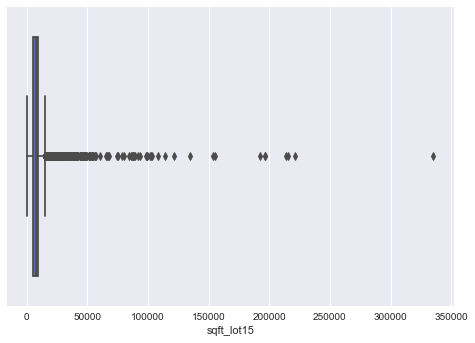

In [128]:
sns.boxplot(x=df11['sqft_lot15'])

Text(0, 0.5, 'Price')

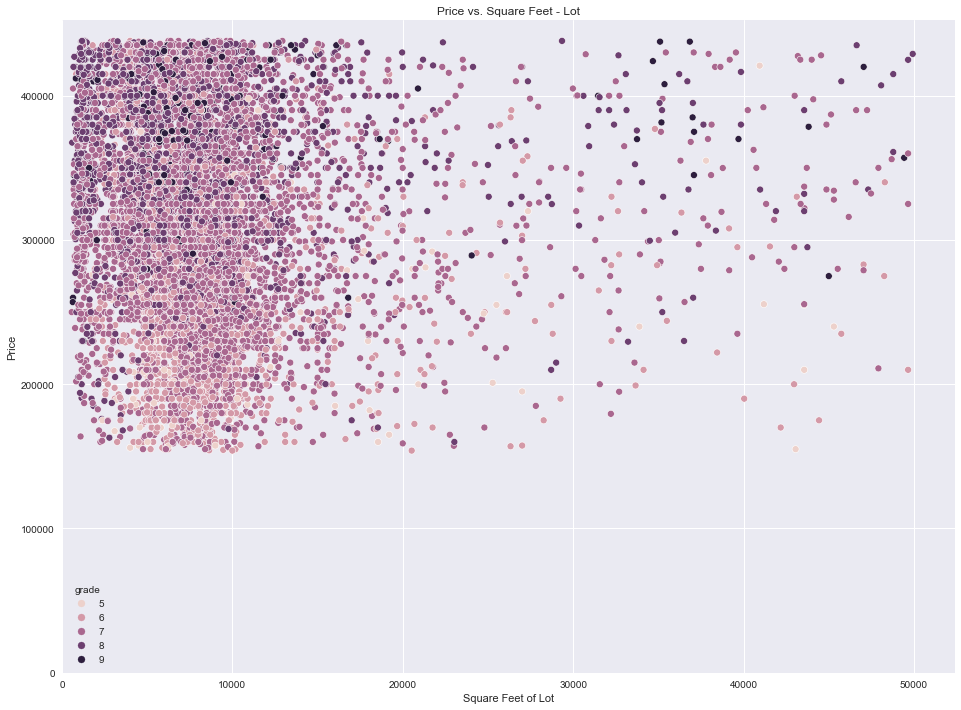

In [129]:
plt.figure(figsize=(16,12))
ax = sns.scatterplot(data=df11, x="sqft_lot", y="price", hue="grade")
plt.xlim(0,None)
plt.ylim(0,None)
plt.title("Price vs. Square Feet - Lot")
plt.xlabel("Square Feet of Lot")
plt.ylabel("Price")

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000  0.012701  0.000521   0.028628     0.008800 -0.090754   
price          0.012701  1.000000  0.119963   0.263198     0.298315 -0.050016   
bedrooms       0.000521  0.119963  1.000000   0.446608     0.633950  0.108687   
bathrooms      0.028628  0.263198  0.446608   1.000000     0.666431 -0.077631   
sqft_living    0.008800  0.298315  0.633950   0.666431     1.000000  0.141563   
sqft_lot      -0.090754 -0.050016  0.108687  -0.077631     0.141563  1.000000   
floors         0.016573  0.209542  0.110903   0.519666     0.281426 -0.272702   
waterfront    -0.019366  0.013981 -0.024631  -0.026897    -0.025957  0.060897   
view           0.031159  0.068262 -0.008831   0.000663     0.041883  0.058470   
condition     -0.037290 -0.044942  0.017182  -0.172850    -0.083736  0.124621   
grade          0.044445  0.342969  0.270637   0.549476     0.536107 -0.026897   
sqft_above     0.007930  0.234829  0.485041   0.594834     0.796582  0.103424   
sqft_basement  0.001676  0.120946  0.278597   0.169247     0.396032  0.068711   
yr_built       0.028258  0.119461  0.200054   0.639398     0.376713 -0.141014   
yr_renovated  -0.019023  0.010762 -0.007646  -0.027862    -0.001921  0.028790   
zipcode       -0.017512  0.081948 -0.166810  -0.254153    -0.233638 -0.154178   
lat           -0.023926  0.467245 -0.214175  -0.238216    -0.293728 -0.151957   
long           0.008892  0.019036  0.109096   0.198068     0.176384  0.223821   
sqft_living15 -0.004420  0.271706  0.359403   0.488400     0.652313  0.173631   
sqft_lot15    -0.081886 -0.038577  0.041243  -0.060343     0.063176  0.629619   
bed_bath       0.018485  0.237342  0.786370   0.880520     0.756676 -0.002921   
yrbuilt_95     0.007328  0.014695 -0.140582  -0.207742    -0.151041  0.008153   
yrbuilt_75    -0.025831 -0.079179 -0.126828  -0.415139    -0.248746  0.070584   
yrbuilt_55    -0.008599 -0.093328  0.176774  -0.047210     0.083160  0.197154   
yrbuilt_35     0.007115  0.000858  0.062389   0.330134     0.173558  0.066814   
yrbuilt_15     0.031997  0.185903  0.033980   0.419781     0.184797 -0.337161   
lat_2          0.016825 -0.274995  0.157747   0.195817     0.225169  0.102014   
lat_3          0.009233 -0.150299  0.134342   0.134336     0.176768  0.100800   
lat_4         -0.016785 -0.018490 -0.084713  -0.134790    -0.137059 -0.078835   
lat_5          0.001941  0.212865 -0.114023  -0.083259    -0.149577 -0.102574   
lat_6         -0.011860  0.342140 -0.130993  -0.137605    -0.166517 -0.069326   

                 floors  waterfront      view  condition     grade  \
id             0.016573   -0.019366  0.031159  -0.037290  0.044445   
price          0.209542    0.013981  0.068262  -0.044942  0.342969   
bedrooms       0.110903   -0.024631 -0.008831   0.017182  0.270637   
bathrooms      0.519666   -0.026897  0.000663  -0.172850  0.549476   
sqft_living    0.281426   -0.025957  0.041883  -0.083736  0.536107   
sqft_lot      -0.272702    0.060897  0.058470   0.124621 -0.026897   
floors         1.000000   -0.009677 -0.046245  -0.272932  0.410164   
waterfront    -0.009677    1.000000  0.216238   0.023825 -0.041574   
view          -0.046245    0.216238  1.000000   0.020455  0.006686   
condition     -0.272932    0.023825  0.020455   1.000000 -0.191806   
grade          0.410164   -0.041574  0.006686  -0.191806  1.000000   
sqft_above     0.496417   -0.027116 -0.014531  -0.145250  0.542808   
sqft_basement -0.296339   -0.000354  0.091746   0.079538  0.038704   
yr_built       0.569535   -0.027585 -0.065375  -0.286332  0.575083   
yr_renovated  -0.028107   -0.003571 -0.000207  -0.040383 -0.049601   
zipcode       -0.087292   -0.004490  0.075671  -0.056267 -0.200928   
lat           -0.048933   -0.013420 -0.050706  -0.058688 -0.151460   
long           0.098495   -0.046114 -0.021904   0.003359  0.097528   
sqft_living15  0.221039   -0.020976  0.092884  -0.128084  0.502820   
sqft_lot15    -0.175675    0

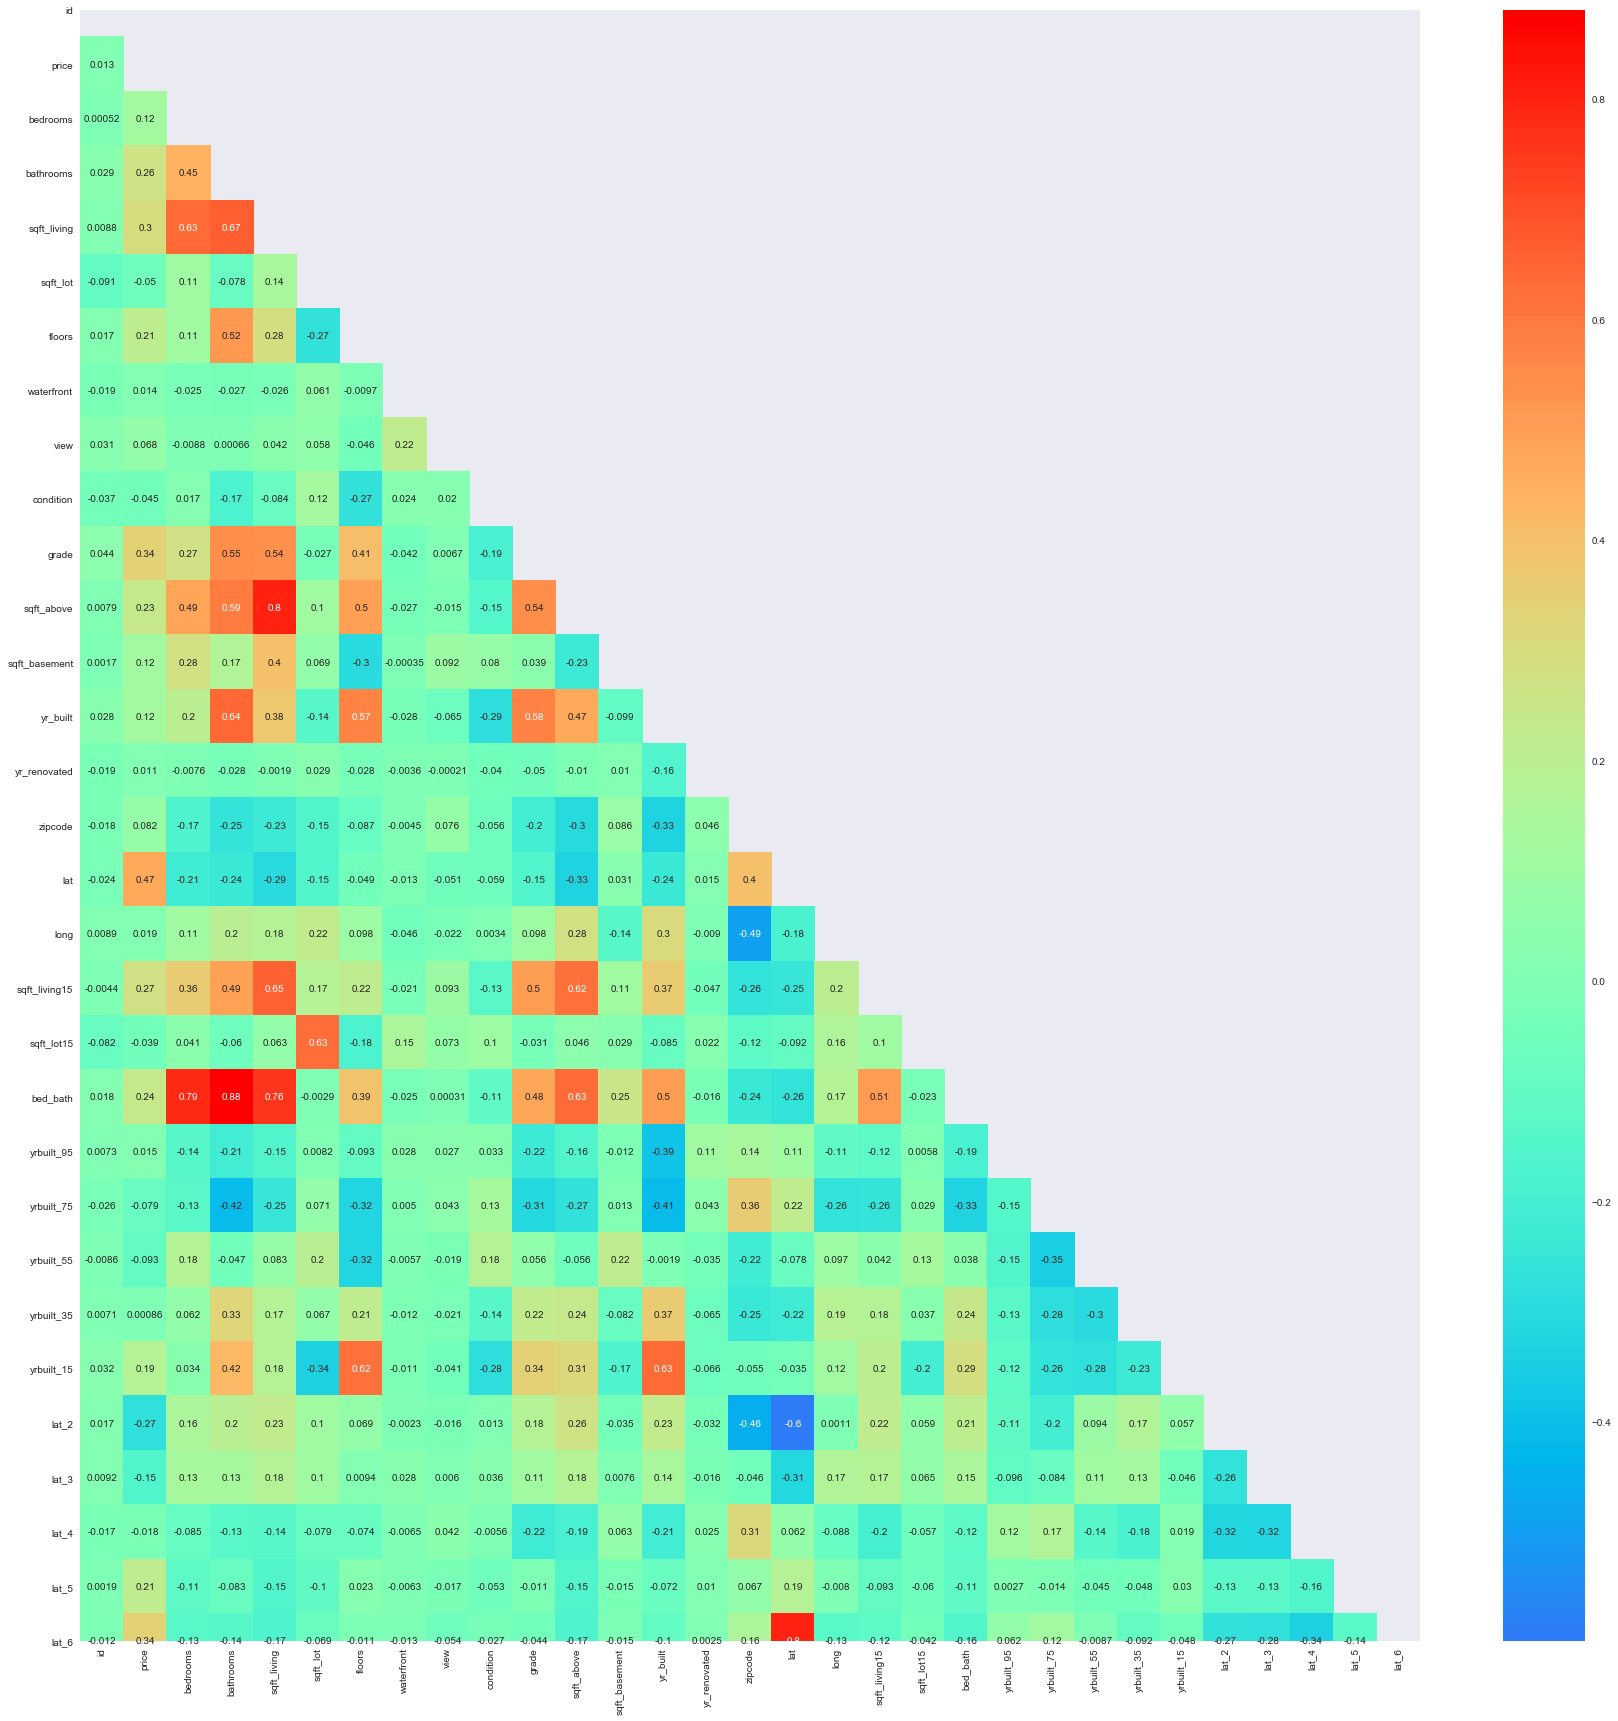

In [241]:
corr = df11.corr()
display(corr)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30,30))
sns.heatmap(corr, cmap='rainbow', mask = mask, annot=True, center=0)

In [134]:
df11.head(2)

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3        1.0         1180   
2  5631500400   2/25/2015  180000.0         2        1.0          770   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         0.0   0.0          3      7        1180   
2     10000     1.0         0.0   0.0          3      6         770   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0            0.0      1955           0.0    98178  47.5112 -122.257   
2            0.0      1933           0.0    98028  47.7379 -122.233   

   sqft_living15  sqft_lot15         lat_bands yrbuilt_bands  yrbuilt_95  \
0           1340        5650   (47.467, 47.57]            75           0   
2           2720        8062  (47.674, 47.778]            95           1   

   yrbuilt_75  yrbuilt_55  yrbuilt_35  yrbuilt_15  lat_2  lat_3  lat_4  lat_5  \
0           1           0           0           0      0      0      1      0   
2           0           0           0           0      0      0      0      0   

   lat_6  
0      0  
2      1

In [258]:
#Drop unnecessary columns, looking at correlations and what we don't need.
df12 = df11.drop(['id', 'zipcode', 'bedrooms', 'bathrooms', 'lat_bands'], axis=1)

In [136]:
df12.head(2)

date     price  sqft_living  sqft_lot  floors  waterfront  view  \
0  10/13/2014  221900.0         1180      5650     1.0         0.0   0.0   
2   2/25/2015  180000.0          770     10000     1.0         0.0   0.0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180            0.0      1955           0.0   
2          3      6         770            0.0      1933           0.0   

       lat     long  sqft_living15  sqft_lot15 yrbuilt_bands  yrbuilt_95  \
0  47.5112 -122.257           1340        5650            75           0   
2  47.7379 -122.233           2720        8062            95           1   

   yrbuilt_75  yrbuilt_55  yrbuilt_35  yrbuilt_15  lat_2  lat_3  lat_4  lat_5  \
0           1           0           0           0      0      0      1      0   
2           0           0           0           0      0      0      0      0   

   lat_6  
0      0  
2      1

In [259]:
df12 = df12.drop(['date', 'sqft_lot', 'floors', 'waterfront', 'sqft_above', 'sqft_basement', \
                 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', \
                 'yrbuilt_95', 'yrbuilt_15', 'lat_2', 'yrbuilt_bands', 'bed_bath', 'yr_built'], axis=1)

In [260]:
# Create train, test split
train, test = train_test_split(df12, test_size=0.25, random_state=42)
print(train.shape, test.shape)

(7239, 12) (2414, 12)


In [261]:
train.head(2)

price  sqft_living  view  condition  grade  yrbuilt_75  yrbuilt_55  \
5740   225000.0         1250   0.0          3      7           0           1   
17283  364000.0         1020   0.0          5      6           1           0   

       yrbuilt_35  lat_3  lat_4  lat_5  lat_6  
5740            0      1      0      0      0  
17283           0      0      0      0      1

In [262]:
#Running the final model after various models and experimentation we found these were our best variables
outcome = 'price'
predictors = train.drop(['price'], axis=1)
pred_sum = "+".join(predictors)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=train).fit()

In [263]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     695.3
Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:16:04   Log-Likelihood:                -88591.
No. Observations:                7239   AIC:                         1.772e+05
Df Residuals:                    7227   BIC:                         1.773e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -3.23e+04   7900.461     -4.088      0.000   -4.78e+04   -1.68e+04
sqft_living    50.9758      1.416     35.997      0.000      48.200      53.752
view         1.329e+04   1612.491      8.241      0.000    1.01e+04    1.64e+04
condition    1.222e+04    983.845     12.418      0.000    1.03e+04    1.41e+04
grade         2.49e+04   1011.555     24.611      0.000    2.29e+04    2.69e+04
yrbuilt_75  -1.994e+04   1708.018    -11.674      0.000   -2.33e+04   -1.66e+04
yrbuilt_55  -2.094e+04   1654.246    -12.660      0.000   -2.42e+04   -1.77e+04
yrbuilt_35  -7050.8781   1810.686     -3.894      0.000   -1.06e+04   -3501.404
lat_3        2.623e+04   1800.379     14.570      0.000    2.27e+04    2.98e+04
lat_4        6.812e+04   1794.752     37.953      0.000    6.46e+04    7.16e+04
lat_5        1.354e+05   2806.260     48.242      0.000     1.3e+05    1.41e+05
lat_6        1.168e+05   1857.675     62.873      0.000    1.13e+05     1.2e+05
==============================================================================
Omnibus:                       67.183   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.820
Skew:                          -0.113   Prob(JB):                     2.57e-21
Kurtosis:                       3.513   Cond. No.                     2.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Interpretation of our FINAL Model: 

We ran our training data set with 7,212 records, and used 11 predictor variables to try and predict home prices (target variable). We got an r2 value of 0.518, which means that our model (predictor variables) can account for 52% of the variation in home prices. We found that all of the predictor variables had low p-values and were therefore significant. By looking at the t-values we see the relative importance of each predictor - with the latitude bands and sqft_living being the most important. We can use the coefficients for each predictor to illustrate our model as well.  For example: 
Size: Each additional sq. ft of living area will add $52 to the home price, when all other features are held constant.
Location: A home in latitude 5 (Seattle) will add ~$135K to the home price versus a home in latitude 1 (south).

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


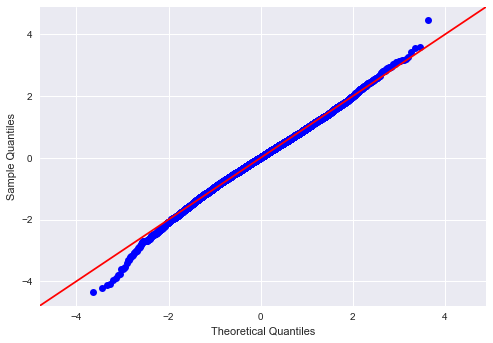

In [264]:
# QQ-Plot
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

Text(0.5, 0.99, 'Residuals Scatterplot')

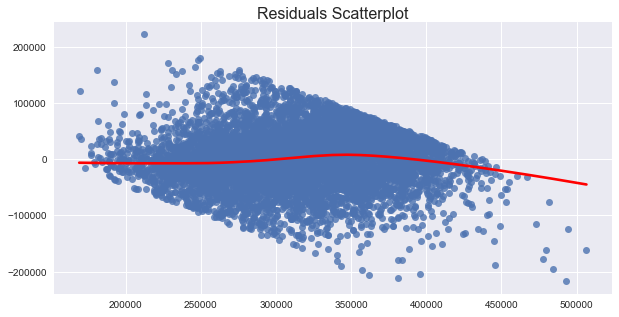

In [265]:
plt.figure(figsize=(10,5))
sns.regplot(x=model.predict(), y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot', fontsize=16, y=.99)

In [266]:
# Conduct a final check of RMSE (after 3 models with train)
# Split data into x and y versions of train and test
y_test = test[['price']]
X_test = test.drop(['price'],axis=1)
y_train = train[['price']]
X_train = train.drop(['price'],axis=1)

In [267]:
# Try and baseline this to the test data set (before changes)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [268]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Root Mean Squarred Error:', train_mse**0.5)
print('Test Root Mean Squarred Error:', test_mse**0.5)

Train Root Mean Squarred Error: 49966.8160225452
Test Root Mean Squarred Error: 49307.57685468789


In [274]:
#Prediction plug and play
df12.drop(['price'], axis=1)
linreg.predict(np.array([2000,0,4,7,0,0,1,0,0,0,1]).reshape(1,-1))

array([[402540.19042378]])

In [275]:
df14 = df12.drop(['price'], axis=1)

In [276]:
Y=df12[['price']]

In [277]:
X=df14

In [278]:
X.head(2)

sqft_living  view  condition  grade  yrbuilt_75  yrbuilt_55  yrbuilt_35  \
0         1180   0.0          3      7           1           0           0   
2          770   0.0          3      6           0           0           0   

   lat_3  lat_4  lat_5  lat_6  
0      0      1      0      0  
2      0      0      0      1

In [271]:
#Running cross validation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [279]:
# Uses original X and Y data - not train or test
model = LinearRegression()
scores = cross_val_score(model, X, Y, cv=8, scoring="r2")
print (scores)

[0.50012948 0.531374   0.50388437 0.48114011 0.51559394 0.52957585
 0.53672391 0.46941402]


In [280]:
scores.mean()

0.5084794602944305

In [ ]:
# Observations for r2: 
# range 0.47 to 0.54
# average of 0.51
# This is inline with wht we have seen in our model summary with the train data.
# It tells us that our model can explain 51% of the variation in home prices based on our predictors (in the model)

In [282]:
model = LinearRegression()
scores = cross_val_score(model, X, Y, cv=8, scoring="neg_mean_squared_error")
print (scores)

[-2.53752915e+09 -2.71652570e+09 -2.37940023e+09 -2.60151639e+09
 -2.50538115e+09 -2.38078604e+09 -2.50621657e+09 -2.31204144e+09]


In [284]:
rmse_scores = np.sqrt(-scores)
print (rmse_scores)

[50373.89356451 52120.30030025 48779.0962473  51005.06241948
 50053.78258873 48793.29914888 50062.12707274 48083.69206607]


In [285]:
rmse_scores.mean()

49908.90667599447

In [ ]:
# Observations for RMSE: 
# RMSE ranges from 48,083 to 52,120
# Mean RMSE is 49,932 for our model

### Additional Exploration Approach

For this model, log transform: grade, sqft_living, bedrooms, condition.
And min/max scale necessary sqft features.

In [299]:
df20 = pd.DataFrame()

In [300]:
#Log transformating features to make the distributions more normal and to see the effect on the model
df20['price'] = df12['price']
df20['grade'] = np.log(df11['grade'])
df20['condition'] = np.log(df11['condition'])
df20['floors'] = np.log(df11['floors'])

In [301]:
#Min Max Scaling SQFT features because they are on a larger scale.
df20['sqft_living'] = (df11['sqft_living'] - min(df11['sqft_living'])) / (max(df11['sqft_living']) - min(df11['sqft_living']))
df20['sqft_lot'] = (df11['sqft_lot'] - min(df11['sqft_lot'])) / (max(df11['sqft_lot']) - min(df11['sqft_lot']))
df20['sqft_living15'] = (df11['sqft_living15'] - min(df11['sqft_living15'])) / (max(df11['sqft_living15']) - min(df11['sqft_living15']))

In [324]:
#Adding the same (untouched) features we were using for the final model to this data frame
df20['yrbuilt_75'] = df12['yrbuilt_75']
df20['yrbuilt_55'] = df12['yrbuilt_55']
df20['yrbuilt_35'] = df12['yrbuilt_35']
df20['lat_3'] = df12['lat_3']
df20['lat_4'] = df12['lat_4']
df20['lat_5'] = df12['lat_5']
df20['lat_6'] = df12['lat_6']
df20['view'] = df12['view']

In [325]:
df20.head(2)

price     grade  condition  floors  sqft_living  sqft_lot  \
0  221900.0  1.945910   1.098612     0.0     0.297794  0.102885   
2  180000.0  1.791759   1.098612     0.0     0.147059  0.191020   

   sqft_living15  yrbuilt_75  yrbuilt_55  yrbuilt_35  lat_3  lat_4  lat_5  \
0       0.268293           1           0           0      0      1      0   
2       0.689024           0           0           0      0      0      0   

   lat_6  view  yrbuilt_15  lat_2  
0      0   0.0           0      0  
2      1   0.0           0      0

In [326]:
# Create train, test split
train, test = train_test_split(df20, test_size=0.25, random_state=42)
print(train.shape, test.shape)

(7239, 17) (2414, 17)


In [328]:
#Model
from statsmodels.formula.api import ols
outcome = 'price'
predictors = train.drop(['price', 'sqft_lot', 'floors'], axis=1)
pred_sum = "+".join(predictors)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=train).fit()

In [329]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     569.5
Date:                Sun, 29 Nov 2020   Prob (F-statistic):               0.00
Time:                        16:01:43   Log-Likelihood:                -88512.
No. Observations:                7239   AIC:                         1.771e+05
Df Residuals:                    7224   BIC:                         1.772e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.804e+05    1.5e+04    -12.050      0.000    -2.1e+05   -1.51e+05
grade           1.56e+05   7552.021     20.659      0.000    1.41e+05    1.71e+05
condition      4.668e+04   3507.927     13.306      0.000    3.98e+04    5.36e+04
sqft_living    1.123e+05   4373.218     25.690      0.000    1.04e+05    1.21e+05
sqft_living15  7.829e+04   6180.574     12.666      0.000    6.62e+04    9.04e+04
yrbuilt_75     -2.06e+04   2156.168     -9.556      0.000   -2.48e+04   -1.64e+04
yrbuilt_55    -2.276e+04   2295.254     -9.917      0.000   -2.73e+04   -1.83e+04
yrbuilt_35    -9209.4444   2541.128     -3.624      0.000   -1.42e+04   -4228.091
lat_3          3.405e+04   4405.944      7.728      0.000    2.54e+04    4.27e+04
lat_4          7.835e+04   4374.360     17.911      0.000    6.98e+04    8.69e+04
lat_5          1.451e+05   4871.354     29.786      0.000    1.36e+05    1.55e+05
lat_6          1.258e+05   4417.867     28.475      0.000    1.17e+05    1.34e+05
view           1.161e+04   1615.373      7.190      0.000    8447.897    1.48e+04
yrbuilt_15    -2756.8619   2601.781     -1.060      0.289   -7857.113    2343.389
lat_2          8929.6360   4405.332      2.027      0.043     293.897    1.76e+04
==============================================================================
Omnibus:                       79.248   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.954
Skew:                          -0.129   Prob(JB):                     1.80e-25
Kurtosis:                       3.558   Cond. No.                         76.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


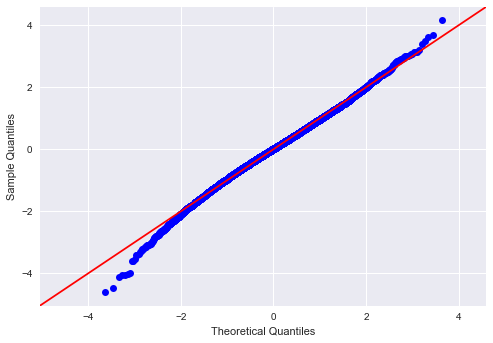

In [330]:
# QQ-Plot
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

Text(0.5, 0.99, 'Residuals Scatterplot')

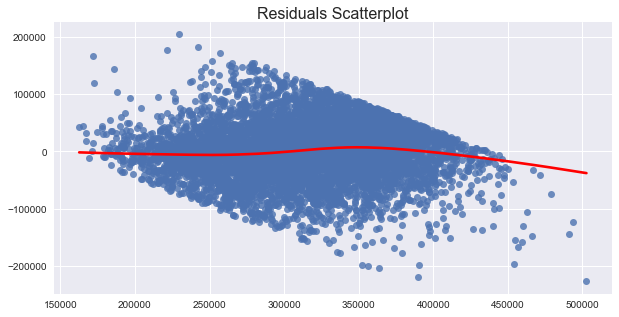

In [331]:
plt.figure(figsize=(10,5))
sns.regplot(x=model.predict(), y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot', fontsize=16, y=.99)

In [332]:
# Split data into x and y versions of train and test
y_test = test[['price']]
X_test = test.drop(['price'],axis=1)
y_train = train[['price']]
X_train = train.drop(['price'],axis=1)

In [333]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [334]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Root Mean Squarred Error:', train_mse**0.5)
print('Test Root Mean Squarred Error:', test_mse**0.5)

Train Root Mean Squarred Error: 49378.859501134444
Test Root Mean Squarred Error: 48823.981126282066


In [335]:
# Try cross validation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [337]:
Y2 = df20['price']

In [339]:
df21 = df20.drop(['price'], axis=1)

In [340]:
X2 = df21

In [341]:
model = LinearRegression()
scores = cross_val_score(model, X2, Y2, cv=8, scoring="r2")
print (scores)

[0.50646653 0.5381383  0.51829932 0.49811755 0.52074977 0.53753201
 0.54757934 0.48985976]


In [342]:
scores.mean()

0.5195928218425727

-Observations for r2: 
-range 0.49 to 0.55
-average of 0.52
-This is inline with wht we have seen in our model summary with the train data.
-It tells us that our model can explain 52% of the variation in home prices based on our predictors (in the model)

In [346]:
model = LinearRegression()
scores = cross_val_score(model, X2, Y2, cv=8, scoring="neg_mean_squared_error")
print (scores)

[-2.50535993e+09 -2.67731448e+09 -2.31026524e+09 -2.51639302e+09
 -2.47871489e+09 -2.34052048e+09 -2.44749121e+09 -2.22294863e+09]


In [347]:
rmse_scores = np.sqrt(-scores)
print (rmse_scores)

[50053.57062343 51742.77223787 48065.21862463 50163.66232286
 49786.69391852 48378.9259681  49472.12561647 47148.15615257]


In [348]:
rmse_scores.mean()

49351.39068305553

-Observations for RMSE: 
-RMSE ranges from 47,148 to 51742
-Mean RMSE is 49351 for our model
-This means that our model, although it can predict house prices,
-we need to keep in mind that there is about $49K error rate (is this + or - $49K?).

Interpreting log coefficients of additional model:
Just divide by 100, this represents the derivative or change in percent of such variable
So, Condition and Grade: So for 1 percent increase in condition, we'd expect a $466 increase in price. ETC. 
        *With all other variables constant.